# NBA Data Scraping

### Information I need + to organize:
- Grab all players data from this year and last year
- Grab all team data from this year and last year
- Grab game data of who is playing (starters, out, etc.)
- Factors: [Opponent Defensive Rating, Player's Minutes Played, Usage Rate, Home/Away Split, Player Efficiency Rating, Injuries or Rest Days, Team Pace, W/L Record of Team]
- binary classification of over or under on one player
- group several players together, find the best parlays

# Work I've Done:

- Scrape data websites using requests and selenium webdrivers
- Use BeautifulSoup to parse the html scrapes into usable data and dataframes
- 40,000+ game stats from 2023 (every game every player has played in the 2022-2023 season)

## Grab All Players' Season Stats for 2023

In [5]:
import requests

player_stats_url = "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"
data=requests.get(playerstats_url)

with open("allplayers.html", "w+") as f:
    f.write(data.text)

In [2]:
# Import Beautiful Soup
from bs4 import BeautifulSoup

In [3]:
with open("allplayers.html") as f:
    page = f.read()

In [4]:
# Use Beautiful Soup's html parser
soup = BeautifulSoup(page, "html.parser")

In [82]:
# Delete the extra header rows inside the tables and grab the per game stats table
soup.find('tr', class_="thead").decompose() 
playergamestats = soup.find_all(id="per_game_stats")

In [54]:
# Import pandas
import pandas as pd

In [83]:
# Add 2023 year as a column and transfer table to a DataFrame
playerstats = pd.read_html(str(playergamestats))[0]
year = 2023
playerstats["Year"] = year

/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/4065947887.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  playerstats = pd.read_html(str(playergamestats))[0]


In [84]:
# Export to csv file
playerstats.to_csv("2023playerstats.csv")

## Grab All Individual Game Stats for Every Player

In [109]:
!pip install unidecode

Python(16275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 219.2 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [119]:
# {} = 5 letters from last name, 2 letters from first name, 01
all_games_url = "https://www.basketball-reference.com/players/a/{}/gamelog/2023"
all_namecodes = set()
most_recent = ""
# go through the all players dataframe to find their individual 2023 season game stats
for row in range(650, 680): #already did 0-185, 185-300, 300-390, 390-500, 500-650, 650-
    decoded = unidecode(playerstats["Player"][row])
    full_name = decoded.split(" ")
    first_name = full_name[0]
    last_name = full_name[1]
    digit = 1
    namecode = last_name[0:5].lower()+ first_name[0:2].lower() + "0" + str(digit) #create namecode

    #If multiple of same namecode, skip (players who have switched teams)
    if namecode == most_recent:
        continue
        
    most_recent = namecode #update most recent namecode
    all_namecodes.add(namecode) #add to set

    # Scrape Data
    url = all_games_url.format(namecode)
    data = requests.get(url)
    with open("Players/{}.html".format(decoded), "w+") as f:
        f.write(data.text)
    print(decoded, playerstats["Rk"][row])

Andrew Wiggins 513
Lindell Wigginton 514
Alondes Williams 515
Donovan Williams 516
Grant Williams 517
Jalen Williams 518
Jeenathan Williams 520
Kenrich Williams 521
Mark Williams 522
Patrick Williams 523
Robert Williams 524
Vince Williams Jr. 525
Ziaire Williams 526
Dylan Windler 528
Justise Winslow 529
James Wiseman 530
Christian Wood 531
Delon Wright 532
McKinley Wright IV 533
Gabe York 534
Thaddeus Young 535
Trae Young 536
Omer Yurtseven 537
Cody Zeller 538
Ivica Zubac 539


KeyError: 679

In [114]:
# NEED TO DOUBLE CHECK AND MAKE SURE ALL THE PAGES ARE OF THE CORRECT PLAYERS
len(playerstats["Player"])

679

In [140]:
# AJ Green
url = 'https://www.basketball-reference.com/players/g/greenaj01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('A.J. Green'), "w+") as f:
    f.write(data.text)

In [141]:
# AJ Lawson
url = 'https://www.basketball-reference.com/players/l/lawsoaj01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('A.J. Lawson'), "w+") as f:
    f.write(data.text)

In [142]:
# Alondes Williams
url = 'https://www.basketball-reference.com/players/w/willial06/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Alondes Williams'), "w+") as f:
    f.write(data.text)

In [143]:
# Alize Johnson
url = 'https://www.basketball-reference.com/players/j/johnsal02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Alize Johnson'), "w+") as f:
    f.write(data.text)

In [144]:
# Anthony Davis
url = 'https://www.basketball-reference.com/players/d/davisan02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Anthony Davis'), "w+") as f:
    f.write(data.text)

In [145]:
# Cam Thomas
url = 'https://www.basketball-reference.com/players/t/thomaca02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Cam Thomas'), "w+") as f:
    f.write(data.text)

In [146]:
# Cameron Johnson
url = 'https://www.basketball-reference.com/players/j/johnsca02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Cameron Johnson'), "w+") as f:
    f.write(data.text)

In [147]:
# Carlik Jones
url = 'https://www.basketball-reference.com/players/j/jonesca03/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Carlik Jones'), "w+") as f:
    f.write(data.text)

In [148]:
# Cedi Osman
url = 'https://www.basketball-reference.com/players/o/osmande01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Cedi Osman'), "w+") as f:
    f.write(data.text)

In [149]:
# Clint Capela
url = 'https://www.basketball-reference.com/players/c/capelca01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format('Clint Capela'), "w+") as f:
    f.write(data.text)

In [151]:
# D'Angelo Russell
name= "D'Angelo Russell"
url = 'https://www.basketball-reference.com/players/r/russeda01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [153]:
# Damian Jones
name= "Damian Jones"
url = 'https://www.basketball-reference.com/players/j/jonesda03/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [154]:
# Damion Lee
name= "Damion Lee"
url = 'https://www.basketball-reference.com/players/l/leeda03/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [155]:
# Danny Green
name= "Danny Green"
url = 'https://www.basketball-reference.com/players/g/greenda02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [156]:
# Dennis Smith Jr.
name= "Dennis Smith Jr."
url = 'https://www.basketball-reference.com/players/s/smithde03/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [159]:
# Deonte Burton
name= "Deonte Burton"
url = 'https://www.basketball-reference.com/players/b/burtode02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [160]:
# Derrick Jones Jr.
name= "Derrick Jones Jr."
url = 'https://www.basketball-reference.com/players/j/jonesde02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [161]:
# Donovan Williams
name= "Donovan Williams"
url = 'https://www.basketball-reference.com/players/w/willido02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [162]:
# Duane Washington Jr.
name= "Duane Washington Jr."
url = 'https://www.basketball-reference.com/players/w/washidu02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [163]:
# Frank Ntilikina
name= "Frank Ntilikina"
url = 'https://www.basketball-reference.com/players/n/ntilila01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [164]:
# Gary Payton II
name= "Gary Payton II"
url = 'https://www.basketball-reference.com/players/p/paytoga02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [165]:
# Gary Trent Jr.
name= "Gary Trent Jr."
url = 'https://www.basketball-reference.com/players/t/trentga02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [166]:
# Harrison Barnes
name= "Harrison Barnes"
url = 'https://www.basketball-reference.com/players/b/barneha02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [167]:
# Jabari Smith Jr.
name= "Jabari Smith Jr."
url = 'https://www.basketball-reference.com/players/s/smithja05/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [168]:
# Jack White
name= "Jack White"
url = 'https://www.basketball-reference.com/players/w/whiteja03/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [169]:
# Jaden Hardy
name= "Jaden Hardy"
url = 'https://www.basketball-reference.com/players/h/hardyja02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [170]:
# Jaden McDaniels
name= "Jaden McDaniels"
url = 'https://www.basketball-reference.com/players/m/mcdanja02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [171]:
# Jalen Green
name= "Jalen Green"
url = 'https://www.basketball-reference.com/players/g/greenja05/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [173]:
# Jalen Johnson
name= "Jalen Johnson"
url = 'https://www.basketball-reference.com/players/j/johnsja05/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [174]:
# Jalen Williams
name= "Jalen Williams"
url = 'https://www.basketball-reference.com/players/w/willija06/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [175]:
# Jared Butler
name= "Jared Butler"
url = 'https://www.basketball-reference.com/players/b/butleja02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [176]:
# Jaren Jackson Jr.
name= "Jaren Jackson Jr."
url = 'https://www.basketball-reference.com/players/j/jacksja02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [177]:
# Jaxson Hayes
name= "Jaxson Hayes"
url = 'https://www.basketball-reference.com/players/h/hayesja02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [178]:
# Jaylen Brown
name= "Jaylen Brown"
url = 'https://www.basketball-reference.com/players/b/brownja02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [179]:
# Jeenathan Williams
name= "Jeenathan Williams"
url = 'https://www.basketball-reference.com/players/w/willije02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [180]:
# Jeff Green
name= "Jeff Green"
url = 'https://www.basketball-reference.com/players/g/greenje02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [181]:
# Jeremiah Robinson-Earl
name= "Jeremiah Robinson-Earl"
url = 'https://www.basketball-reference.com/players/r/robinje02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [182]:
# Johnny Davis
name= "Johnny Davis"
url = 'https://www.basketball-reference.com/players/d/davisjo06/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [183]:
# Jordan Hall
name= "Jordan Hall"
url = 'https://www.basketball-reference.com/players/h/halljo02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [184]:
# Josh Green
name= "Josh Green"
url = 'https://www.basketball-reference.com/players/g/greenjo02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [185]:
# Keegan Murray
name= "Keegan Murray"
url = 'https://www.basketball-reference.com/players/m/murrake02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [187]:
# Keldon Johnson
name= "Keldon Johnson"
url = 'https://www.basketball-reference.com/players/j/johnske04/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [188]:
# Kemba Walker
name= "Kemba Walker"
url = 'https://www.basketball-reference.com/players/w/walkeke02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [189]:
# Kendall Brown
name= "Kendall Brown"
url = 'https://www.basketball-reference.com/players/b/brownke03/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [190]:
# Kenrich Williams
name= "Kenrich Williams"
url = 'https://www.basketball-reference.com/players/w/willike04/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [191]:
# Kessler Edwards
name= "Kessler Edwards"
url = 'https://www.basketball-reference.com/players/e/edwarke02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [192]:
# Kevin Porter Jr.
name= "Kevin Porter Jr."
url = 'https://www.basketball-reference.com/players/p/porteke02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [193]:
# KJ Martin
name= "KJ Martin"
url = 'https://www.basketball-reference.com/players/m/martike04/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [194]:
# Larry Nance Jr.
name= "Larry Nance Jr."
url = 'https://www.basketball-reference.com/players/n/nancela02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [195]:
# Louis King
name= "Louis King"
url = 'https://www.basketball-reference.com/players/k/kinglo02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [196]:
# Marcus Morris
name= "Marcus Morris"
url = 'https://www.basketball-reference.com/players/m/morrima03/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [197]:
# Mark Williams
name= "Mark Williams"
url = 'https://www.basketball-reference.com/players/w/willima07/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [198]:
# Max Christie
name= "Max Christie"
url = 'https://www.basketball-reference.com/players/c/chrisma02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [199]:
# Maxi Kleber
name= "Maxi Kleber"
url = 'https://www.basketball-reference.com/players/k/klebima01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [200]:
# Michael Foster Jr.
name= "Michael Foster Jr."
url = 'https://www.basketball-reference.com/players/f/fostemi02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [201]:
# P.J. Tucker
name= "P.J. Tucker"
url = 'https://www.basketball-reference.com/players/t/tuckepj01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [202]:
# P.J. Washington
name= "P.J. Washington"
url = 'https://www.basketball-reference.com/players/w/washipj01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [203]:
# Patty Mills
name= "Patty Mills"
url = 'https://www.basketball-reference.com/players/m/millspa02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [204]:
# R.J. Hampton
name= "R.J. Hampton"
url = 'https://www.basketball-reference.com/players/h/hamptrj01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [206]:
# Ron Harper Jr.
name= "Ron Harper Jr."
url = 'https://www.basketball-reference.com/players/h/harpero02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [205]:
# Robert Williams
name= "Robert Williams"
url = 'https://www.basketball-reference.com/players/w/williro04/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [207]:
# Royce O'Neale
name= "Royce O'Neale"
url = 'https://www.basketball-reference.com/players/o/onealro01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [208]:
# Sandro Mamukelashvili
name= "Sandro Mamukelashvili"
url = 'https://www.basketball-reference.com/players/m/mamuksa01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [209]:
# Scotty Pippen Jr.
name= "Scotty Pippen Jr."
url = 'https://www.basketball-reference.com/players/p/pippesc02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [210]:
# Stanley Johnson
name= "Stanley Johnson"
url = 'https://www.basketball-reference.com/players/j/johnsst04/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [211]:
# Sterling Brown
name= "Sterling Brown"
url = 'https://www.basketball-reference.com/players/b/brownst02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [212]:
# T.J. McConnell
name= "T.J. McConnell"
url = 'https://www.basketball-reference.com/players/m/mccontj01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [213]:
# T.J. Warren
name= "T.J. Warren"
url = 'https://www.basketball-reference.com/players/w/warretj01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [214]:
# Taurean Prince
name= "Taurean Prince"
url = 'https://www.basketball-reference.com/players/p/princta02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [215]:
# Terance Mann
name= "Terance Mann"
url = 'https://www.basketball-reference.com/players/m/mannte01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [216]:
# Terence Davis
name= "Terence Davis"
url = 'https://www.basketball-reference.com/players/d/daviste02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [217]:
# Theo Maledon
name= "Theo Maledon"
url = 'https://www.basketball-reference.com/players/m/maledth01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [220]:
# Tim Hardaway Jr.
name= "Tim Hardaway Jr."
url = 'https://www.basketball-reference.com/players/h/hardati02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [219]:
# Tobias Harris
name= "Tobias Harris"
url = 'https://www.basketball-reference.com/players/h/harrito02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [221]:
# Trey Murphy III
name= "Trey Murphy III"
url = 'https://www.basketball-reference.com/players/m/murphtr02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [222]:
# TyTy Washington Jr.
name= "TyTy Washington Jr."
url = 'https://www.basketball-reference.com/players/w/washity02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [223]:
# Wesley Matthews
name= "Wesley Matthews"
url = 'https://www.basketball-reference.com/players/m/matthwe02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [224]:
# Ziaire Williams
name= "Ziaire Williams"
url = 'https://www.basketball-reference.com/players/w/willizi02/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [226]:
# Zion Williamson
name= "Zion Williamson"
url = 'https://www.basketball-reference.com/players/w/willizi01/gamelog/2023'
data = requests.get(url)
with open("Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [231]:
# Bojan Bogdanovic
name= "Bojan Bogdanovic"
url = 'https://www.basketball-reference.com/players/b/bogdabo02/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [233]:
# Justin Champagnie
name= "Justin Champagnie"
url = 'https://www.basketball-reference.com/players/c/champju01/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [235]:
# JaMychal Green
name= "JaMychal Green"
url = 'https://www.basketball-reference.com/players/g/greenja01/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [238]:
# Javonte Green
name= "Javonte Green"
url = 'https://www.basketball-reference.com/players/g/greenja02/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [240]:
# James Johnson
name= "James Johnson"
url = 'https://www.basketball-reference.com/players/j/johnsja01/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [242]:
# Keon Johnson
name= "Keon Johnson"
url = 'https://www.basketball-reference.com/players/j/johnske07/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [242]:
# Keon Johnson
name= "Keon Johnson"
url = 'https://www.basketball-reference.com/players/j/johnske07/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [248]:
# Caleb Martin
name= "Caleb Martin"
url = 'https://www.basketball-reference.com/players/m/martica02/gamelog/2023'
data = requests.get(url)
with open("2023/Players/{}.html".format(name), "w+") as f:
    f.write(data.text)

In [250]:
import os

year = 2023
dfs = []

# Get list of all files in the directory
player_files = os.listdir("2023/Players")

for filename in player_files:
    # Construct the full file path
    filepath = os.path.join("2023/Players", filename)

    try:
        with open(filepath) as f:
            page = f.read()
    except Exception as e:
        print(f"Error reading file {filepath}: {e}")
        continue

    soup = BeautifulSoup(page, "html.parser")
    
    elements = soup.find_all('tr', class_='thead')
    for element in elements:
        element.decompose()
    
    games_table = soup.find(id="pgl_basic")

    if games_table:
        try:
            player_name = filename.replace('.html', '')
            print(player_name)
            games = pd.read_html(str(games_table))[0]
            # Extract player name from filename or modify as needed
            games["Player"] = unidecode(player_name)
            games["Year"] = year
            dfs.append(games)
        except Exception as e:
            print(f"Error processing table in file {filepath}: {e}")
    else:
        print(f"No games table found in file {filepath}")

Kevin Durant


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Shai Gilgeous-Alexander
Cade Cunningham


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Harrison Barnes
Jrue Holiday


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


TyTy Washington Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kai Jones
Frank Kaminsky


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


De'Aaron Fox
Delon Wright


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dru Smith
Bones Hyland


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Marvin Bagley III
Coby White


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Justise Winslow
Donte DiVincenzo


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Franz Wagner


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Charles Bassey
Collin Sexton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Alperen Sengun
Alize Johnson
Josh Richardson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing litera

Eric Gordon
Jacob Gilyard
Udonis Haslem
Shaquille Harrison


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Johnny Davis
Jalen Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Vlatko Cancar


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kyle Lowry
Kenneth Lofton Jr.
Johnny Juzang


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing litera

Jaden Springer
Svi Mykhailiuk


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Herbert Jones
Jeff Dowtin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bobby Portis
Bryce McGowens


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jaren Jackson Jr.
Nickeil Alexander-Walker


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Clint Capela


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Zach Collins
Ivica Zubac


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tyrese Martin
Nikola Vucevic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Josh Green


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Walker Kessler
Duane Washington Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Caleb Martin
Mike Conley


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


De'Anthony Melton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Alec Burks
Sam Merrill
Frank Jackson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Desmond Bane
Garrett Temple


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kevon Looney
Russell Westbrook


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kevin Huerter
Jaden McDaniels


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Gabe Vincent
Ron Harper Jr.
Louis King


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Theo Pinson
T.J. McConnell


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


James Harden
Shake Milton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Roby


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Myles Turner
Ish Smith


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Paul George
Anthony Lamb


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Wesley Matthews
Jaxson Hayes


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Wendell Moore Jr.
Leandro Bolmaro
Alondes Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Moses Brown
Luka Doncic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jarred Vanderbilt


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jalen Duren
Ziaire Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Trent Forrest
Skylar Mays
Draymond Green


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Grant Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Chris Duarte
Terry Rozier


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Omer Yurtseven
Patrick Beverley


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jayson Tatum
Dewayne Dedmon


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Willy Hernangomez
Jaylen Brown


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Michael Porter Jr.
Donovan Mitchell


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Todd
Gorgui Dieng


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Chris Boucher
Immanuel Quickley


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dalen Terry
Bennedict Mathurin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Lamar Stevens


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Malik Beasley
Ryan Rollins


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Gary Trent Jr.
Malachi Flynn


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Juan Toscano-Anderson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Otto Porter Jr.
Markelle Fultz


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Khris Middleton
Naz Reid


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jarrell Brantley
Xavier Moon
David Roddy


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Gary Payton II
Matt Ryan


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Mark Williams
CJ McCollum


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Larry Nance Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


LeBron James
Kevin Knox


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Thomas Bryant
Cody Martin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Trey Lyles


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Nerlens Noel
Wendell Carter Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Raul Neto
Moussa Diabate
Danny Green


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing litera

KZ Okpala
Richaun Holmes


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Keita Bates-Diop
Anfernee Simons


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Joe Wieskamp
Jevon Carter


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Cameron Johnson
Nikola Jovic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


JD Davison
Zach LaVine


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Xavier Sneed
Torrey Craig


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Aaron Nesmith


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Miles McBride
Derrick Jones Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bruno Fernando
Troy Brown Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Moritz Wagner


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Lauri Markkanen


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Max Strus
Reggie Jackson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kyle Kuzma
Furkan Korkmaz


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dalano Banton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kendall Brown
Jaylen Nowell


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Lonnie Walker IV
Buddy Boeheim


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bradley Beal


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Al Horford
Kendrick Nunn


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Karl-Anthony Towns
Montrezl Harrell
Jeenathan Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Taj Gibson
Darius Garland


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Reggie Bullock
John Konchar


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Hamidou Diallo
Drew Eubanks


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


LaMelo Ball
Lester Quinones


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Serge Ibaka
Georges Niang


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kris Dunn
Christian Koloko
Lindell Wigginton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Blake Wesley
Chris Silva


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bryn Forbes
Cody Zeller
James Johnson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tyus Jones
Royce O'Neale


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Alex Len
Khem Birch


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


P.J. Washington
Jarrett Allen


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Malcolm Brogdon


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Mason Plumlee
Dennis Smith Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jerami Grant
Kentavious Caldwell-Pope


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Will Barton
Braxton Key


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jabari Walker
Patrick Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Thaddeus Young
Ousmane Dieng
Vernon Carey Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Nick Richards


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Norman Powell
Javonte Green
A.J. Lawson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Shaedon Sharpe
McKinley Wright IV


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jaden Hardy
Christian Wood
Chima Moneke
Patrick Baldwin Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


David Duke Jr.
Brook Lopez


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Caris LeVert
Mikal Bridges


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dennis Schroder
Ben Simmons


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jamal Cain
Nathan Knight


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Jackson
Jordan Schakel
Robert Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bam Adebayo
Evan Fournier


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tyrese Maxey


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Josh Okogie
Udoka Azubuike


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Keldon Johnson
Doug McDermott


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dylan Windler
Keon Ellis


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Lindy Waters III
Devonte' Graham


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Brandon Boston Jr.
Jae Crowder


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Paul Reed


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Buddy Hield
Jonas Valanciunas


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Justin Holiday
Stanley Johnson
Scotty Pippen Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Precious Achiuwa


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Santi Aldama
Cam Reddish


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Zeke Nnaji
Rudy Gay


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Grayson Allen
John Collins


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kristaps Porzingis
Cameron Payne


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Robin Lopez
Terance Mann


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Goran Dragic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Juancho Hernangomez
Justin Champagnie
Scottie Barnes


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Devin Booker
Davion Mitchell


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Goga Bitadze
Patty Mills


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


DeAndre Jordan
Rudy Gobert


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Amir Coffey
Garrison Mathews


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tre Mann
Mamadi Diakite
Mac McClung


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Micah Potter
Trevor Hudgins
Payton Pritchard


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Malaki Branham


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Joel Embiid
Kevon Harris


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Josh Hart
Caleb Houstan


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


KJ Martin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Marcus Morris
Jake LaRavia
Donovan Williams


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Max Christie
Paolo Banchero


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Onyeka Okongwu
Gary Harris


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tre Jones
Frank Ntilikina


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dereon Seabron
Kawhi Leonard


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jose Alvarado
Jordan Nwora


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Aaron Wiggins
Rui Hachimura


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Corey Kispert


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Luke Kornet
Keon Johnson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Matthew Dellavedova
Austin Rivers


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Meyers Leonard
Danuel House Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Orlando Robinson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Livers
Domantas Sabonis


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Joe


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Sterling Brown
Luka Garza


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jericho Sims
Chance Comanche
Ayo Dosunmu


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


AJ Griffin
Vit Krejci


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Xavier Tillman Sr.
RaiQuan Gray
Julian Champagnie


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bol Bol
Jordan Goodwin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


JaVale McGee
Jae'Sean Tate


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kessler Edwards


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


James Bouknight
R.J. Hampton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kemba Walker
Jock Landale


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jarrett Culver
Fred VanVleet


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Mfiondu Kabengele
Devon Dotson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jalen Johnson
John Wall


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jordan Poole
Yuta Watanabe


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tony Bradley


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Marcus Smart
Jason Preston
Jamaree Bouyea


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kelly Oubre Jr.
Kevin Love


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jalen Green


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


P.J. Tucker


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Anthony Edwards


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Chimezie Metu
Josh Christopher


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tyler Dorsey
Terrence Ross


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Damion Lee


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tim Hardaway Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Maxi Kleber
Facundo Campazzo
Kennedy Chandler


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Trae Young


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Day'Ron Sharpe
Jakob Poeltl


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


John Butler
Daniel Theis
Malcolm Hill


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Pascal Siakam


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Hartenstein
Bismack Biyombo


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jay Scrubb
Naji Marshall
Deonte Burton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jordan Hall
Michael Carter-Williams
Dominick Barlow


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dorian Finney-Smith
Vince Williams Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Austin Reaves
Taurean Prince


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Eugene Omoruyi
Kyrie Irving


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Giannis Antetokounmpo
Josh Minott


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kenrich Williams
Deni Avdija


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Cory Joseph


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Wenyen Gabriel
Kira Lewis Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Cam Thomas
James Wiseman


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jaden Ivey
Trey Murphy III


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Andrew Nembhard
Anthony Gill


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Christian Braun
Dean Wade


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Ochai Agbaji


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Mitchell Robinson
Spencer Dinwiddie


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Victor Oladipo
Bojan Bogdanovic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


D'Angelo Russell
Justin Minaya


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


MarJon Beauchamp
Jonathan Isaac


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tyrese Haliburton
Terry Taylor


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Nikola Jokic
Stanley Umude
Blake Griffin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


PJ Dozier
Darius Days
Jalen Suggs


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing litera

Terence Davis
Ish Wainright


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Neemias Queta
Josh Giddey
Klay Thompson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Stephen Curry
Sam Hauser


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Luka Samanic
Nassir Little
Michael Foster Jr.
Kevin Porter Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Ja Morant
Andre Drummond


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Olivier Sarr
Damian Jones


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tari Eason
Luguentz Dort
Error reading file 2023/Players/.ipynb_checkpoints: [Errno 21] Is a directory: '2023/Players/.ipynb_checkpoints'


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Alex Caruso
Admiral Schofield


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Chuma Okeke
Quenton Jackson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Duncan Robinson
Obi Toppin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Malik Monk
A.J. Green


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dwight Powell


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Quentin Grimes
Dyson Daniels


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bruce Brown
Daniel Gafford


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Landry Shamet
Jared Butler


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Moses Moody
Luke Kennard


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jalen Brunson
Kelly Olynyk


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Derrick Rose


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Andre Iguodala
DeMar DeRozan


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Dario Saric
Brandon Clarke


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Marko Simonovic
Jusuf Nurkic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Romeo Langford
Jordan McLaughlin


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Mobley
Joshua Primo
Kyle Anderson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Joe Harris


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Monte Morris
Trendon Watford


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Chris Paul
JT Thor


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Boban Marjanovic
Jay Huff


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Cole Swider
Thanasis Antetokounmpo
Trevor Keels


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


JaMychal Green
Dillon Brooks


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


George Hill


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Oshae Brissett
Damian Lillard


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Nicolas Batum
Robert Covington


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Kobi Simmons
Jeremy Sochan


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Ryan Arcidiacono
Saben Lee
Justin Jackson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Pat Connaughton
Jeremiah Robinson-Earl


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Ricky Rubio


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


OG Anunoby
Anthony Davis


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Zion Williamson
Edmond Sumner


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Carlik Jones
Gordon Hayward


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jordan Clarkson
Jamal Murray


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Cedi Osman
Peyton Watson


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Darius Bazley
Dejounte Murray


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Cole Anthony
Evan Mobley


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Ty Jerome
De'Andre Hunter


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Bogdan Bogdanovic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Usman Garuba
Gabe York
Simone Fontecchio


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Keegan Murray
Mo Bamba


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jabari Smith Jr.


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jack White
Matisse Thybulle


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Seth Curry


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Tobias Harris
Nic Claxton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaiah Stewart
Theo Maledon
Xavier Cooks


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Killian Hayes
Tyler Herro


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Derrick White


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Julius Randle
Jared Rhoden


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jimmy Butler
T.J. Warren


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Brandon Ingram
Davis Bertans


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Talen Horton-Tucker
Deandre Ayton


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Saddiq Bey
Aaron Gordon


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Greg Brown III
Daishen Nix


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


RJ Barrett
Trevelin Queen


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jonathan Kuminga
Sandro Mamukelashvili


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Steven Adams
Davon Reed


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Haywood Highsmith
Aleksej Pokusevski


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Andrew Wiggins
Aaron Holiday


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Jeff Green


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Rodney McGruder
Noah Vonleh


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Isaac Okoro
Mike Muscala


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


Devin Vassell
Joe Ingles


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]
/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/2730899919.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  games = pd.read_html(str(games_table))[0]


In [252]:
all_players_data = pd.concat(dfs)

In [254]:
all_players_data

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year
0,1,1.0,2022-10-19,34-020,BRK,NaN,NOP,L (-22),1,31:46,...,2,1,4,4,4,32,21.8,-23,Kevin Durant,2023
1,2,2.0,2022-10-21,34-022,BRK,NaN,TOR,W (+4),1,35:27,...,6,0,2,5,2,27,18.5,-8,Kevin Durant,2023
2,3,3.0,2022-10-24,34-025,BRK,@,MEM,L (-10),1,39:01,...,4,0,0,1,4,37,30.3,-10,Kevin Durant,2023
3,4,4.0,2022-10-26,34-027,BRK,@,MIL,L (-11),1,38:52,...,3,0,2,5,3,33,19.6,-17,Kevin Durant,2023
4,5,5.0,2022-10-27,34-028,BRK,NaN,DAL,L (-4),1,41:14,...,5,2,1,3,2,37,30.8,-6,Kevin Durant,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,43.0,2023-04-02,35-182,MIL,NaN,PHI,W (+13),0,19:32,...,2,1,0,1,0,6,6.4,+13,Joe Ingles,2023
78,79,44.0,2023-04-04,35-184,MIL,@,WAS,W (+12),0,27:37,...,5,2,1,3,0,12,13.5,+2,Joe Ingles,2023
79,80,45.0,2023-04-05,35-185,MIL,NaN,CHI,W (+13),0,24:18,...,3,2,0,2,1,9,7.3,+10,Joe Ingles,2023
80,81,NaN,2023-04-07,35-187,MIL,NaN,MEM,L (-23),Did Not Play,Did Not Play,...,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Joe Ingles,2023


In [299]:
all_players_data.to_csv(r'2023/Players/2023playerstats.csv')

In [274]:
!xattr -d com.apple.quarantine ~/Desktop/chromedriver-mac-arm64/chromedriver

Python(32404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [277]:
!pip install webdriver-manager

Python(32420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [286]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
# Create a Service object with the path to ChromeDriver
service = Service(ChromeDriverManager().install())

# Instantiate the WebDriver with the Service object
driver = webdriver.Chrome(service=service)


# Scraping Team Data from 2023

# team_codes = {"MIL": "Milwaukee Bucks", "BOS": "Boston Celtics", "PHI": "Philadelphia 76ers", "CLE": "Cleveland Cavaliers", "NYK": "New York Knicks", "BRK": "Brooklyn Nets", "MIA": "Miami Heat", "ATL": "Atlanta Hawks", "TOR": "Toronto Raptors", "CHI": "Chicago Bulls", "IND": "Indiana Pacers", "WAS": "Washinton Wizards", "ORL": "Orlando Magic", "CHO": "Charlotte Hornets", "DET": "Detroit Pistons", "SAC": "Sacramento Kings", "OKC": "Oklahoma City Thunder", "LAC": "Los Angeles Clippers", "HOU": "Houston Rockets", "UTA": "Utah Jazz", "NOP": "New Orleans Pelicans", "POR": "Portland Trailblazers", "MIN": "Minnesota Timberwolves", "SAS": "San Antonio Spurs", "DAL": "Dallas Mavericks", "GSW": "Golden State Warriors", "MEM": "Memphis Grizzlies", "DEN": "Denver Nuggets", "PHO": "Phoenix Suns", "LAL": "Los Angeles Lakers"}
team_codes = {"CLE": "Cleveland Cavaliers", "NYK": "New York Knicks", "BRK": "Brooklyn Nets", "MIA": "Miami Heat", "ATL": "Atlanta Hawks", "TOR": "Toronto Raptors", "CHI": "Chicago Bulls", "IND": "Indiana Pacers", "WAS": "Washinton Wizards", "ORL": "Orlando Magic", "CHO": "Charlotte Hornets", "DET": "Detroit Pistons", "SAC": "Sacramento Kings", "OKC": "Oklahoma City Thunder", "LAC": "Los Angeles Clippers", "HOU": "Houston Rockets", "UTA": "Utah Jazz", "NOP": "New Orleans Pelicans", "POR": "Portland Trailblazers", "MIN": "Minnesota Timberwolves", "SAS": "San Antonio Spurs", "DAL": "Dallas Mavericks", "GSW": "Golden State Warriors", "MEM": "Memphis Grizzlies", "DEN": "Denver Nuggets", "PHO": "Phoenix Suns", "LAL": "Los Angeles Lakers"}
team_stats_url = "https://www.basketball-reference.com/teams/{}/2023.html"
print(len(team_codes))

# go through the all teams
for team_code in team_codes: 
    # Scrape Data
    url = team_stats_url.format(team_code)
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    html = driver.page_source
    
    with open("2023/Teams/{}.html".format(team_codes[team_code]), "w+") as f:
        f.write(html)
    print(team_codes[team_code])

Python(35218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35221) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35223) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35224) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(35230) Malloc

27
Cleveland Cavaliers
New York Knicks
Brooklyn Nets
Miami Heat
Atlanta Hawks
Toronto Raptors
Chicago Bulls
Indiana Pacers
Washinton Wizards
Orlando Magic
Charlotte Hornets
Detroit Pistons
Sacramento Kings
Oklahoma City Thunder
Los Angeles Clippers
Houston Rockets
Utah Jazz
New Orleans Pelicans
Portland Trailblazers
Minnesota Timberwolves
San Antonio Spurs
Dallas Mavericks
Golden State Warriors
Memphis Grizzlies
Denver Nuggets
Phoenix Suns
Los Angeles Lakers


In [288]:
team_files = os.listdir("2023/Teams")

team_dfs = []

for filename in team_files:
    # Construct the full file path
    filepath = os.path.join("2023/Teams", filename)

    try:
        with open(filepath) as f:
            page = f.read()
    except Exception as e:
        print(f"Error reading file {filepath}: {e}")
        continue

    soup = BeautifulSoup(page, "html.parser")
    
    elements = soup.find_all('tr', class_='over_header')
    for element in elements:
        element.decompose()

    elements = soup.find_all('tr', attrs={'data-row': "1"})
    for element in elements:
        element.decompose()
    
    misc_table = soup.find(id="team_misc")
    if misc_table:
        try:
            team_name = filename.replace('.html', '')
            table = pd.read_html(str(misc_table))[0]
            # Extract player name from filename or modify as needed
            table["Team"] = team_name
            table["Year"] = year
            team_dfs.append(table)
            print(team_name)
        except Exception as e:
            print(f"Error processing table in file {filepath}: {e}")
    else:
        print(f"No games table found in file {filepath}")

/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Portland Trailblazers


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


New Orleans Pelicans


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Detroit Pistons


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Los Angeles Clippers


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Atlanta Hawks


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Denver Nuggets


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Minnesota Timberwolves


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Washinton Wizards


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Boston Celtics


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Houston Rockets


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Brooklyn Nets


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Miami Heat


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Los Angeles Lakers


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Toronto Raptors


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


New York Knicks


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Phoenix Suns


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Milwaukee Bucks


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Memphis Grizzlies


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Dallas Mavericks


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Orlando Magic


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Indiana Pacers


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Cleveland Cavaliers


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


San Antonio Spurs


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Philadelphia 76ers
Error reading file 2023/Teams/.ipynb_checkpoints: [Errno 21] Is a directory: '2023/Teams/.ipynb_checkpoints'


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Charlotte Hornets


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Utah Jazz


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Sacramento Kings


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Golden State Warriors


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


Oklahoma City Thunder
Chicago Bulls


/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_10665/736443067.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(misc_table))[0]


In [291]:
team_stats_data = pd.concat(team_dfs)

In [292]:
team_stats_data

,Unnamed: 0,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attendance,Team,Year
0,Team,33,49,31,51,-4.01,0.05,-3.96,114.8,118.8,...,22.4,0.230,0.563,12.1,74.9,0.217,Moda Center,767374,Portland Trailblazers,2023
0,Team,42,40,46,36,1.89,-0.26,1.63,114.4,112.5,...,24.7,0.221,0.543,13.4,77.4,0.212,Smoothie King Center,687691,New Orleans Pelicans,2023
0,Team,17,65,22,60,-8.22,0.49,-7.73,110.7,118.9,...,24.9,0.227,0.557,11.9,74.0,0.231,Little Caesars Arena,759715,Detroit Pistons,2023
0,Team,44,38,42,40,0.50,-0.19,0.31,115.0,114.5,...,22.9,0.217,0.543,11.7,76.6,0.195,Crypto.com Arena,720543,Los Angeles Clippers,2023
0,Team,41,41,42,40,0.29,0.02,0.32,116.6,116.3,...,25.1,0.200,0.552,12.4,75.8,0.206,State Farm Arena,719787,Atlanta Hawks,2023
0,Team,53,29,49,33,3.33,-0.29,3.04,117.6,114.2,...,24.8,0.194,0.543,12.2,76.4,0.201,Ball Arena,788635,Denver Nuggets,2023
0,Team,42,40,41,41,-0.04,-0.18,-0.22,113.7,113.8,...,21.5,0.205,0.540,13.3,74.3,0.225,Target Center,687510,Minnesota Timberwolves,2023
0,Team,35,47,38,44,-1.21,0.15,-1.06,114.4,115.6,...,22.6,0.202,0.540,11.0,76.1,0.194,Capital One Arena,710481,Washinton Wizards,2023
0,Team,57,25,57,25,6.52,-0.15,6.38,118.0,111.5,...,22.1,0.197,0.528,11.3,78.5,0.180,TD Garden,766240,Boston Celtics,2023
0,Team,22,60,23,59,-7.85,0.24,-7.62,111.4,119.3,...,30.2,0.215,0.564,11.8,75.8,0.218,Toyota Center,668865,Houston Rockets,2023


In [294]:
team_stats_data.to_csv(r'2023/Teams/2023teamstats.csv')

## Combine All Data for 2023:

Games stats | player's season averages | Team's Stats

In [576]:
game_stats_2023 = pd.read_csv("2023/Players/2023player_individual_games_stats.csv")

In [577]:
game_stats_2023

,Unnamed: 0,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year
0,0,1,1.0,2022-10-19,34-020,BRK,NaN,NOP,L (-22),1,31:46,11,21,.524,2,6,.333,8,9,.889,0,3,3,2,1,4,4,4,32,21.8,-23,Kevin Durant,2023
1,1,2,2.0,2022-10-21,34-022,BRK,NaN,TOR,W (+4),1,35:27,8,18,.444,3,9,.333,8,10,.800,1,4,5,6,0,2,5,2,27,18.5,-8,Kevin Durant,2023
2,2,3,3.0,2022-10-24,34-025,BRK,@,MEM,L (-10),1,39:01,14,20,.700,1,3,.333,8,9,.889,1,4,5,4,0,0,1,4,37,30.3,-10,Kevin Durant,2023
3,3,4,4.0,2022-10-26,34-027,BRK,@,MIL,L (-11),1,38:52,10,23,.435,1,4,.250,12,13,.923,0,6,6,3,0,2,5,3,33,19.6,-17,Kevin Durant,2023
4,4,5,5.0,2022-10-27,34-028,BRK,NaN,DAL,L (-4),1,41:14,12,21,.571,2,5,.400,11,11,1.000,1,2,3,5,2,1,3,2,37,30.8,-6,Kevin Durant,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39929,77,78,43.0,2023-04-02,35-182,MIL,NaN,PHI,W (+13),0,19:32,2,3,.667,2,3,.667,0,0,NaN,0,1,1,2,1,0,1,0,6,6.4,+13,Joe Ingles,2023
39930,78,79,44.0,2023-04-04,35-184,MIL,@,WAS,W (+12),0,27:37,4,6,.667,4,6,.667,0,0,NaN,0,3,3,5,2,1,3,0,12,13.5,+2,Joe Ingles,2023
39931,79,80,45.0,2023-04-05,35-185,MIL,NaN,CHI,W (+13),0,24:18,3,7,.429,3,7,.429,0,0,NaN,0,1,1,3,2,0,2,1,9,7.3,+10,Joe Ingles,2023
39932,80,81,NaN,2023-04-07,35-187,MIL,NaN,MEM,L (-23),Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Joe Ingles,2023


In [97]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [98]:
game_stats_2023.columns

Index(['Unnamed: 0', 'Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp',
       'Unnamed: 7', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'GmSc', '+/-', 'Player', 'Year'],
      dtype='object')

In [578]:
season_stats_2023 = pd.read_csv('2023/Players/2023player_season_stats.csv')

In [579]:
for row in season_stats_2023.index:
    if unidecode(season_stats_2023['Player'][row]) == season_stats_2023['Player'][row]:
        continue
    else:
        season_stats_2023['Player'][row] = unidecode(season_stats_2023['Player'][row])


In [168]:
season_stats_2023["Pos"][113]

'SF'

In [580]:
season_stats_2023 = season_stats_2023.rename(columns={'MP': 'Season MP', 'G': 'Games Played', 'GS': 'Games Started','FG': 'Season FG','ORB': 'Season ORB','DRB': 'Season DRB', 'TRB': 'Season TRB', 'AST': 'Season AST', 'STL': 'Season STL', 'BLK': 'Season BLK', 'TOV': 'Season TOV', 'PF': 'Season PF', 'PTS': 'Season PTS', 'FGA': 'Season FGA', 'FG%': 'Season FG%', '3P': 'Season 3P', '3PA': 'Season 3PA', '3P%': 'Season 3P%', '2P': 'Season 2PA', '2P%': 'Season 2P%', '2PA':'Season 2PA', 'eFG%': 'Season eFG%', 'FT': 'Season FT', 'FTA': 'Season FTA', 'FT%': 'Season FT%'})

In [581]:
season_stats_2023 = season_stats_2023.rename(columns={'2PA':'Season 2PA'})

In [582]:
season_stats_2023.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'Games Played',
       'Games Started', 'Season MP', 'Season FG', 'Season FGA', 'Season FG%',
       'Season 3P', 'Season 3PA', 'Season 3P%', 'Season 2PA', 'Season 2PA',
       'Season 2P%', 'Season eFG%', 'Season FT', 'Season FTA', 'Season FT%',
       'Season ORB', 'Season DRB', 'Season TRB', 'Season AST', 'Season STL',
       'Season BLK', 'Season TOV', 'Season PF', 'Season PTS', 'Year'],
      dtype='object')

In [583]:
combined_df = pd.merge(game_stats_2023, season_stats_2023, left_on=['Player', 'Year', 'Tm'], right_on=['Player', 'Year', 'Tm'], how='left', suffixes=('_game', '_season'))

In [584]:
combined_df = combined_df.rename(columns={'Tm':'Team'})

In [585]:
combined_df

,Unnamed: 0_game,Rk_game,G,Date,Age_game,Team,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year,Unnamed: 0_season,Rk_season,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS
0,0,1,1.0,2022-10-19,34-020,BRK,NaN,NOP,L (-22),1,31:46,11,21,.524,2,6,.333,8,9,.889,0,3,3,2,1,4,4,4,32,21.8,-23,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
1,1,2,2.0,2022-10-21,34-022,BRK,NaN,TOR,W (+4),1,35:27,8,18,.444,3,9,.333,8,10,.800,1,4,5,6,0,2,5,2,27,18.5,-8,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
2,2,3,3.0,2022-10-24,34-025,BRK,@,MEM,L (-10),1,39:01,14,20,.700,1,3,.333,8,9,.889,1,4,5,4,0,0,1,4,37,30.3,-10,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
3,3,4,4.0,2022-10-26,34-027,BRK,@,MIL,L (-11),1,38:52,10,23,.435,1,4,.250,12,13,.923,0,6,6,3,0,2,5,3,33,19.6,-17,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
4,4,5,5.0,2022-10-27,34-028,BRK,NaN,DAL,L (-4),1,41:14,12,21,.571,2,5,.400,11,11,1.000,1,2,3,5,2,1,3,2,37,30.8,-6,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39929,77,78,43.0,2023-04-02,35-182,MIL,NaN,PHI,W (+13),0,19:32,2,3,.667,2,3,.667,0,0,NaN,0,1,1,2,1,0,1,0,6,6.4,+13,Joe Ingles,2023,291.0,228.0,SF,35.0,46.0,0.0,22.7,2.3,5.4,0.435,1.8,4.4,0.409,0.5,1.0,0.556,0.603,0.4,0.5,0.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9
39930,78,79,44.0,2023-04-04,35-184,MIL,@,WAS,W (+12),0,27:37,4,6,.667,4,6,.667,0,0,NaN,0,3,3,5,2,1,3,0,12,13.5,+2,Joe Ingles,2023,291.0,228.0,SF,35.0,46.0,0.0,22.7,2.3,5.4,0.435,1.8,4.4,0.409,0.5,1.0,0.556,0.603,0.4,0.5,0.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9
39931,79,80,45.0,2023-04-05,35-185,MIL,NaN,CHI,W (+13),0,24:18,3,7,.429,3,7,.429,0,0,NaN,0,1,1,3,2,0,2,1,9,7.3,+10,Joe Ingles,2023,291.0,228.0,SF,35.0,46.0,0.0,22.7,2.3,5.4,0.435,1.8,4.4,0.409,0.5,1.0,0.556,0.603,0.4,0.5,0.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9
39932,80,81,NaN,2023-04-07,35-187,MIL,NaN,MEM,L (-23),Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Joe Ingles,2023,291.0,228.0,SF,35.0,46.0,0.0,22.7,2.3,5.4,0.435,1.8,4.4,0.409,0.5,1.0,0.556,0.603,0.4,0.5,0.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9


In [175]:
team_stats_2023 = pd.read_csv('2023/Teams/2023teamstats.csv')

In [176]:
team_stats_2023.head()

,Unnamed: 0.1,Unnamed: 0,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,Pace,FTr,3PAr,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attendance,Team,Year
0,0,Team,33,49,31,51,-4.01,0.05,-3.96,114.8,118.8,98.6,0.289,0.413,0.549,13.1,22.4,0.230,0.563,12.1,74.9,0.217,Moda Center,767374,Portland Trailblazers,2023
1,0,Team,42,40,46,36,1.89,-0.26,1.63,114.4,112.5,99.1,0.279,0.344,0.543,12.9,24.7,0.221,0.543,13.4,77.4,0.212,Smoothie King Center,687691,New Orleans Pelicans,2023
2,0,Team,17,65,22,60,-8.22,0.49,-7.73,110.7,118.9,99.0,0.295,0.372,0.520,13.3,24.9,0.227,0.557,11.9,74.0,0.231,Little Caesars Arena,759715,Detroit Pistons,2023
3,0,Team,44,38,42,40,0.50,-0.19,0.31,115.0,114.5,98.0,0.278,0.387,0.551,12.8,22.9,0.217,0.543,11.7,76.6,0.195,Crypto.com Arena,720543,Los Angeles Clippers,2023
4,0,Team,41,41,42,40,0.29,0.02,0.32,116.6,116.3,100.7,0.244,0.331,0.541,11.2,25.1,0.200,0.552,12.4,75.8,0.206,State Farm Arena,719787,Atlanta Hawks,2023


In [177]:
team_stats_2023 = team_stats_2023.rename(columns={'W':'Team W', 'L':'Team L', 'PW':'Team Expected Wins', 'PL':'Team Expected Losses', 'MOV':'Team Margin of Victory', 'SOS':'Team Strength of Schedule', 'SRS':'Team Rating', 'ORtg':'Team Offensive Rtg', 'DRtg':'Team Defensive Rtg', 'Pace':'Team Pace', 'FTr':'Team FTr', '3PAr':'Team 3PAr', 'eFG%':'Team eFG%', 'TOV%':'Team TOV%', 'ORB%':'Team ORB%', 'FT/FGA':'Team FT/FGA', 'eFG%.1':'Team Opponent eFG%', 'TOV%.1':'Team Oppoent TOV%', 'DRB%':'Team DRB%', 'FT/FGA':'Team Oppoent FT/FGA'})


In [178]:
teamcode = {'BRK': 'Brooklyn Nets', 'PHO': 'Phoenix Suns', 'OKC': 'Oklahoma City Thunder', 'DET': 'Detroit Pistons', 'SAC': 'Sacramento Kings', 'MIL': 'Milwaukee Bucks', 'HOU': 'Houston Rockets', 'CHO': 'Charlotte Hornets', 'ATL': 'Atlanta Hawks',
       'WAS': 'Washinton Wizards', 'MIA': 'Miami Heat', 'DEN': 'Denver Nuggets', 'LAC': 'Los Angeles Clippers', 'CHI': 'Chicago Bulls', 'POR': 'Portland Trailblazers', 'GSW': 'Golden State Warriors', 'ORL': 'Orlando Magic', 'SAS': 'San Antonio Spurs',
       'UTA': 'Utah Jazz', 'NOP': 'New Orleans Pelicans', 'MEM': 'Memphis Grizzlies', 'LAL': 'Los Angeles Lakers', 'PHI': 'Philadelphia 76ers', 'NYK': 'New York Knicks', 'TOR': 'Toronto Raptors', 'MIN': 'Minnesota Timberwolves', 'DAL': 'Dallas Mavericks',
       'CLE': 'Cleveland Cavaliers', 'IND': 'Indiana Pacers', 'BOS': 'Boston Celtics'}

In [179]:
rows = 0
for row in combined_df.index:
    rows=rows+1
print(rows)


39934


In [180]:
combined_df['Team'] = combined_df['Team'].map(teamcode)

In [181]:
combined_df.Team.unique()

array(['Brooklyn Nets', 'Phoenix Suns', 'Oklahoma City Thunder',
       'Detroit Pistons', 'Sacramento Kings', 'Milwaukee Bucks',
       'Houston Rockets', 'Charlotte Hornets', 'Atlanta Hawks',
       'Washinton Wizards', 'Miami Heat', 'Denver Nuggets',
       'Los Angeles Clippers', 'Chicago Bulls', 'Portland Trailblazers',
       'Golden State Warriors', 'Orlando Magic', 'San Antonio Spurs',
       'Utah Jazz', 'New Orleans Pelicans', 'Memphis Grizzlies',
       'Los Angeles Lakers', 'Philadelphia 76ers', 'New York Knicks',
       'Toronto Raptors', 'Minnesota Timberwolves', 'Dallas Mavericks',
       'Cleveland Cavaliers', 'Indiana Pacers', 'Boston Celtics'],
      dtype=object)

In [182]:
fully_combined_df = pd.merge(combined_df, team_stats_2023, left_on=['Team', 'Year'], right_on=['Team', 'Year'], how='left')

In [183]:
fully_combined_df

,Unnamed: 0_game,Rk_game,G,Date,Age_game,Team,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year,Unnamed: 0_season,Rk_season,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS,Unnamed: 0.1,Unnamed: 0,Team W,Team L,Team Expected Wins,Team Expected Losses,Team Margin of Victory,Team Strength of Schedule,Team Rating,Team Offensive Rtg,Team Defensive Rtg,Team Pace,Team FTr,Team 3PAr,Team eFG%,Team TOV%,Team ORB%,Team Oppoent FT/FGA,Team Opponent eFG%,Team Oppoent TOV%,Team DRB%,FT/FGA.1,Arena,Attendance
0,0,1,1.0,2022-10-19,34-020,Brooklyn Nets,NaN,NOP,L (-22),1,31:46,11,21,.524,2,6,.333,8,9,.889,0,3,3,2,1,4,4,4,32,21.8,-23,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,0,Team,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,Barclays Center,724439
1,1,2,2.0,2022-10-21,34-022,Brooklyn Nets,NaN,TOR,W (+4),1,35:27,8,18,.444,3,9,.333,8,10,.800,1,4,5,6,0,2,5,2,27,18.5,-8,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,0,Team,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,Barclays Center,724439
2,2,3,3.0,2022-10-24,34-025,Brooklyn Nets,@,MEM,L (-10),1,39:01,14,20,.700,1,3,.333,8,9,.889,1,4,5,4,0,0,1,4,37,30.3,-10,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,0,Team,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,Barclays Center,724439
3,3,4,4.0,2022-10-26,34-027,Brooklyn Nets,@,MIL,L (-11),1,38:52,10,23,.435,1,4,.250,12,13,.923,0,6,6,3,0,2,5,3,33,19.6,-17,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,0,Team,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,Barclays Center,724439
4,4,5,5.0,2022-10-27,34-028,Brooklyn Nets,NaN,DAL,L (-4),1,41:14,12,21,.571,2,5,.400,11,11,1.000,1,2,3,5,2,1,3,2,37,30.8,-6,Kevin Durant,2023,175.0,137.0,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,0,Team,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,Barclays Center,724439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39929,77,78,43.0,2023-04-02,35-182,Milwaukee Bucks,NaN,PHI,W (+13),0,19:32,2,3,.667,2,3,.667,0,0,NaN,0,1,1,2,1,0,1,0,6,6.4,+13,Joe Ingles,2023,291.0,228.0,SF,35.0,46.0,0.0,22.7,2.3,5.4,0.435,1.8,4.4,0.409,0.5,1.0,0.556,0.603,0.4,0.5,0.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9,0,Team,58,24,50,32,3.63,-0.02,3.61,115.4,111.9,100.5,0.248,0.446,0.555,12.7,25.0,0.184,0.52,10.4,77.8,0.175,Fiserv Forum,718786
39930,78,79,44.0,2023-04-04,35-184,Milwaukee Bucks,@,WAS,W (+12),0,27:37,4,6,.667,4,6,.667,0,0,NaN,0,3,3,5,2,1,3,0,12,13.5,+2,Joe Ingles,2023,291.0,228.0,SF,35.0,46.0,0.0,22.7,2.3,5.4,0.435,1.8,4.4,0.409,0.5,1.0,0.556,0.603,0.4,0.5,0.857,0.3,2.5,2.8,3.3,0.7,0.1,1.2,1.6,6.9,0,Team,58,24,50,32,3.63,-0.02,3.61,115.4,111.9,100.5,0.248,0.446,0.555,12.7,25.0,0.184,0.52,10.4,77.8,0.175,Fiserv Forum,718786


In [184]:
fully_combined_df = fully_combined_df.dropna(subset=['G'])

In [185]:
fully_combined_df['FT%'] = fully_combined_df['FT%'].fillna(0)

/var/folders/zf/zvjhry252b96cr7mfc7yjjt40000gn/T/ipykernel_1359/2224088318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_combined_df['FT%'] = fully_combined_df['FT%'].fillna(0)


In [186]:

fully_combined_df[pd.isnull(fully_combined_df['Pos'])][['Year','Player']]

,Year,Player
23293,2023,Julian Champagnie
23294,2023,Julian Champagnie
23312,2023,Julian Champagnie
23323,2023,Julian Champagnie
23324,2023,Julian Champagnie


In [187]:
# SAVE 2023 DATA TO CSV

fully_combined_df.to_csv(r'2023/full_2023.csv')


In [188]:
data_for_2023 = pd.read_csv('2023/full_2023.csv')

In [611]:
import pandas as pd
from unidecode import unidecode
# Clean Individual Game stats
game_stats_2023 = pd.read_csv("2023/Players/2023player_individual_games_stats.csv")

del game_stats_2023["Unnamed: 0"]
del game_stats_2023["Rk"]

# Clean Season Average stats
season_stats_2023 = pd.read_csv('2023/Players/2023player_season_stats.csv')
season_stats_2023 = season_stats_2023.rename(columns={'MP': 'Season MP', 'G': 'Games Played', 'GS': 'Games Started','FG': 'Season FG','ORB': 'Season ORB','DRB': 'Season DRB', 'TRB': 'Season TRB', 'AST': 'Season AST', 'STL': 'Season STL', 'BLK': 'Season BLK', 'TOV': 'Season TOV', 'PF': 'Season PF', 'PTS': 'Season PTS', 'FGA': 'Season FGA', 'FG%': 'Season FG%', '3P': 'Season 3P', '3PA': 'Season 3PA', '3P%': 'Season 3P%', '2P': 'Season 2PA', '2P%': 'Season 2P%', '2PA':'Season 2PA', 'eFG%': 'Season eFG%', 'FT': 'Season FT', 'FTA': 'Season FTA', 'FT%': 'Season FT%', '2PA':'Season 2PA'})
for row in season_stats_2023.index:
    if unidecode(season_stats_2023['Player'][row]) == season_stats_2023['Player'][row]:
        continue
    else:
        season_stats_2023['Player'][row] = unidecode(season_stats_2023['Player'][row])



                                                     
del season_stats_2023["Unnamed: 0"]
del season_stats_2023["Rk"]

# Clean Team Stats
team_stats_2023 = pd.read_csv('2023/Teams/2023teamstats.csv')
del team_stats_2023["Unnamed: 0.1"]
del team_stats_2023["Unnamed: 0"]
del team_stats_2023["Attendance"]
del team_stats_2023["Arena"]
opp_team_stats_2023 = pd.read_csv('2023/Teams/2023teamstats.csv')
del opp_team_stats_2023["Unnamed: 0.1"]
del opp_team_stats_2023["Unnamed: 0"]
del opp_team_stats_2023["Attendance"]
del opp_team_stats_2023["Arena"]

combined_df_2023 = pd.merge(game_stats_2023, season_stats_2023, left_on=['Player', 'Year', 'Tm'], right_on=['Player', 'Year', 'Tm'], how='left', suffixes=('_game', '_season'))


team_stats_2023 = team_stats_2023.rename(columns={'W':'Team W', 'L':'Team L', 'PW':'Team Expected Wins', 'PL':'Team Expected Losses', 'MOV':'Team Margin of Victory', 'SOS':'Team Strength of Schedule', 'SRS':'Team Rating', 'ORtg':'Team Offensive Rtg', 'DRtg':'Team Defensive Rtg', 'Pace':'Team Pace', 'FTr':'Team FTr', '3PAr':'Team 3PAr', 'eFG%':'Team eFG%', 'TOV%':'Team TOV%', 'ORB%':'Team ORB%', 'FT/FGA':'Team FT/FGA', 'eFG%.1':'Team Opponent eFG%', 'TOV%.1':'Team Oppoent TOV%', 'DRB%':'Team DRB%', 'FT/FGA':'Team FT/FGA', 'FT/FGA.1':'Team Oppoent FT/FGA'})
teamcode = {'BRK': 'Brooklyn Nets', 'PHO': 'Phoenix Suns', 'OKC': 'Oklahoma City Thunder', 'DET': 'Detroit Pistons', 'SAC': 'Sacramento Kings', 'MIL': 'Milwaukee Bucks', 'HOU': 'Houston Rockets', 'CHO': 'Charlotte Hornets', 'ATL': 'Atlanta Hawks',
       'WAS': 'Washinton Wizards', 'MIA': 'Miami Heat', 'DEN': 'Denver Nuggets', 'LAC': 'Los Angeles Clippers', 'CHI': 'Chicago Bulls', 'POR': 'Portland Trailblazers', 'GSW': 'Golden State Warriors', 'ORL': 'Orlando Magic', 'SAS': 'San Antonio Spurs',
       'UTA': 'Utah Jazz', 'NOP': 'New Orleans Pelicans', 'MEM': 'Memphis Grizzlies', 'LAL': 'Los Angeles Lakers', 'PHI': 'Philadelphia 76ers', 'NYK': 'New York Knicks', 'TOR': 'Toronto Raptors', 'MIN': 'Minnesota Timberwolves', 'DAL': 'Dallas Mavericks',
       'CLE': 'Cleveland Cavaliers', 'IND': 'Indiana Pacers', 'BOS': 'Boston Celtics'}
combined_df_2023['Tm'] = combined_df_2023['Tm'].map(teamcode)
combined_df_2023 = combined_df_2023.rename(columns={'Tm': 'Team'})
fully_combined_df_2023 = pd.merge(combined_df_2023, team_stats_2023, left_on=['Team', 'Year'], right_on=['Team', 'Year'], how='left')

opp_team_stats_2023 = opp_team_stats_2023.rename(columns={'W':'Opp Team W', 'L':'Opp Team L', 'PW':'Opp Team Expected Wins', 'PL':'Opp Team Expected Losses', 'MOV':'Opp Team Margin of Victory', 'SOS':'Opp Team Strength of Schedule', 'SRS':'Opp Team Rating', 'ORtg':'Opp Team Offensive Rtg', 'DRtg':'Opp Team Defensive Rtg', 'Pace':'Opp Team Pace', 'FTr':'Opp Team FTr', '3PAr':'Opp Team 3PAr', 'eFG%':'Opp Team eFG%', 'TOV%':'Opp Team TOV%', 'ORB%':'Opp Team ORB%', 'FT/FGA':'Opp Team FT/FGA', 'eFG%.1':'Opp Team Opponent eFG%', 'TOV%.1':'Opp Team Oppoent TOV%', 'DRB%':'Opp Team DRB%', 'FT/FGA':'Opp Team FT/FGA', 'FT/FGA.1':'Opp Team FT/FGA'})
reverse_teamcode = {'Brooklyn Nets': 'BRK', 'Phoenix Suns': 'PHO', 'Oklahoma City Thunder': 'OKC', 'Detroit Pistons': 'DET', 'Sacramento Kings': 'SAC', 'Milwaukee Bucks': 'MIL', 'Houston Rockets': 'HOU', 'Charlotte Hornets': 'CHO', 'Atlanta Hawks': 'ATL',
       'Washinton Wizards': 'WAS', 'Miami Heat': 'MIA', 'Denver Nuggets': 'DEN', 'Los Angeles Clippers': 'LAC', 'Chicago Bulls': 'CHI', 'Portland Trailblazers': 'POR', 'Golden State Warriors': 'GSW', 'Orlando Magic': 'ORL', 'San Antonio Spurs': 'SAS',
       'Utah Jazz': 'UTA', 'New Orleans Pelicans': 'NOP', 'Memphis Grizzlies': 'MEM', 'Los Angeles Lakers': 'LAL', 'Philadelphia 76ers': 'PHI', 'New York Knicks': 'NYK', 'Toronto Raptors': 'TOR', 'Minnesota Timberwolves': 'MIN', 'Dallas Mavericks': 'DAL',
       'Cleveland Cavaliers': 'CLE', 'Indiana Pacers': 'IND', 'Boston Celtics': 'BOS'}
opp_team_stats_2023['Team'] = opp_team_stats_2023['Team'].map(reverse_teamcode)
fully_combined_df_2023 = pd.merge(fully_combined_df_2023, opp_team_stats_2023, left_on=['Opp', 'Year'], right_on=['Team', 'Year'], how='left')
del fully_combined_df_2023["Team_y"]


In [603]:
fully_combined_df_2023

,G,Date,Age_game,Team_x,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS,Team W,Team L,Team Expected Wins,Team Expected Losses,Team Margin of Victory,Team Strength of Schedule,Team Rating,Team Offensive Rtg,Team Defensive Rtg,Team Pace,Team FTr,Team 3PAr,Team eFG%,Team TOV%,Team ORB%,Team FT/FGA,Team Opponent eFG%,Team Oppoent TOV%,Team DRB%,Team Oppoent FT/FGA,Opp Team W,Opp Team L,Opp Team Expected Wins,Opp Team Expected Losses,Opp Team Margin of Victory,Opp Team Strength of Schedule,Opp Team Rating,Opp Team Offensive Rtg,Opp Team Defensive Rtg,Opp Team Pace,Opp Team FTr,Opp Team 3PAr,Opp Team eFG%,Opp Team TOV%,Opp Team ORB%,Opp Team FT/FGA,Opp Team Opponent eFG%,Opp Team Oppoent TOV%,Opp Team DRB%,Opp Team FT/FGA,Team_y
0,1.0,2022-10-19,34-020,Brooklyn Nets,NaN,NOP,L (-22),1,31:46,11,21,.524,2,6,.333,8,9,.889,0,3,3,2,1,4,4,4,32,21.8,-23,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,42,40,46,36,1.89,-0.26,1.63,114.4,112.5,99.1,0.279,0.344,0.543,12.9,24.7,0.221,0.543,13.4,77.4,0.212,NOP
1,2.0,2022-10-21,34-022,Brooklyn Nets,NaN,TOR,W (+4),1,35:27,8,18,.444,3,9,.333,8,10,.800,1,4,5,6,0,2,5,2,27,18.5,-8,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,41,41,45,37,1.48,0.12,1.59,115.5,114.0,97.1,0.257,0.351,0.517,10.3,27.8,0.201,0.565,15.3,76.7,0.223,TOR
2,3.0,2022-10-24,34-025,Brooklyn Nets,@,MEM,L (-10),1,39:01,14,20,.700,1,3,.333,8,9,.889,1,4,5,4,0,0,1,4,37,30.3,-10,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,51,31,51,31,3.94,-0.34,3.60,115.1,111.2,101.1,0.259,0.372,0.540,11.7,26.5,0.190,0.526,13.1,75.9,0.206,MEM
3,4.0,2022-10-26,34-027,Brooklyn Nets,@,MIL,L (-11),1,38:52,10,23,.435,1,4,.250,12,13,.923,0,6,6,3,0,2,5,3,33,19.6,-17,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,58,24,50,32,3.63,-0.02,3.61,115.4,111.9,100.5,0.248,0.446,0.555,12.7,25.0,0.184,0.520,10.4,77.8,0.175,MIL
4,5.0,2022-10-27,34-028,Brooklyn Nets,NaN,DAL,L (-4),1,41:14,12,21,.571,2,5,.400,11,11,1.000,1,2,3,5,2,1,3,2,37,30.8,-6,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,38,44,41,41,0.07,-0.22,-0.14,116.8,116.7,96.6,0.298,0.487,0.565,11.4,18.0,0.225,0.549,11.9,75.5,0.226,DAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39929,43.0,2023-04-02,35-182,Milwaukee Bucks,NaN,PHI,W (+13),0,19:32,2,3,.667,2,3,.667,0,0,NaN,0,1,1,2,1,0,1,0,6,6.4,+13,Joe Ingles,2023,SF,35.0,46.0,0.0,22.7,2.3,5.4,0.435,1

In [612]:
fully_combined_df_2023 = fully_combined_df_2023.dropna(subset=['G'])
fully_combined_df_2023['FT%'] = fully_combined_df_2023['FT%'].fillna(0)
fully_combined_df_2023.to_csv(r'2023/full_2023.csv')

## Scrape 2024 Data

In [536]:
import requests
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
data=requests.get(player_stats_url)

with open("2024/Players/2024allplayers.html", "w+") as f:
    f.write(data.text)

with open("2024/Players/2024allplayers.html") as f:
    page = f.read()

soup = BeautifulSoup(page, "html.parser")
soup.find('tr', class_="thead").decompose() 
playergamestats = soup.find_all(id="per_game_stats")
playerstats = pd.read_html(str(playergamestats))[0]
year = 2024
playerstats["Year"] = year
playerstats.to_csv("2024/Players/2024playerstats.csv")

In [538]:
# {} = 5 letters from last name, 2 letters from first name, 01
all_games_url = "https://www.basketball-reference.com/players/{}/gamelog/2024"
all_namecodes = set()
most_recent = ""
# go through the all players dataframe to find their individual 2024 season game stats
for row in range(360, 390): #already did - 0-47, * 48-82, * 83-113, * 114-144, * 145-175, 175-205, 295-234, 234-264, 264-300, 300-330, 330-360, 360-390, 390-420
    decoded = unidecode(playerstats["Player"][row])
    if decoded == "Player":
        continue
    full_name = decoded.split(" ")
    first_name = full_name[0]
    last_name = full_name[1]
    last_name_letter = last_name[0]
    namecode = last_name_letter + "/" + last_name[0:5].lower()+ first_name[0:2].lower() + "01" #create namecode

    #If multiple of same namecode, skip (players who have switched teams)
    if namecode == most_recent:
        continue
        
    most_recent = namecode #update most recent namecode
    all_namecodes.add(namecode) #add to set

    # Scrape Data
    url = all_games_url.format(namecode)
    data = requests.get(url)
    with open("2024/Players/{}.html".format(decoded), "w+") as f:
        f.write(data.text)
    print(decoded, playerstats["Rk"][row], row)

Jordan Miller 319 360
Leonard Miller 320 361
Dariq Whitehead 321 363
Patty Mills 322 364
Shake Milton 323 365
Justin Minaya 324 366
Josh Minott 325 367
Davion Mitchell 326 368
Donovan Mitchell 327 369
Evan Mobley 328 370
Isaiah Mobley 329 371
Malik Monk 330 372
Moses Moody 331 373
Xavier Moon 332 374
Taze Moore 333 375
Wendell Moore Jr. 334 376
Ja Morant 335 377
Marcus Morris 336 378
Monte Morris 338 380
Trey Murphy III 339 381
Dejounte Murray 340 382
Jamal Murray 341 384
Keegan Murray 342 385
Kris Murray 343 386
Mike Muscala 344 387


In [315]:
playerstats[315:345]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
315,281,Brook Lopez,C,35,MIL,47,47,31.8,5.0,10.1,...,1.6,3.9,5.5,1.6,0.6,2.8,1.0,2.7,13.1,2024
316,282,Robin Lopez,C,35,MIL,13,0,2.9,0.2,0.6,...,0.1,0.2,0.2,0.3,0.0,0.1,0.1,0.3,0.8,2024
317,283,Kevin Love,PF,35,MIA,36,5,18.1,2.9,6.6,...,1.1,5.1,6.2,2.3,0.4,0.2,0.8,1.8,9.1,2024
318,284,Kyle Lowry,PG,37,MIA,37,35,28.0,2.8,6.5,...,0.7,2.8,3.5,4.0,1.1,0.4,1.4,2.5,8.2,2024
319,285,Seth Lundy,SF,23,ATL,9,0,5.8,0.4,1.9,...,0.1,0.7,0.8,0.0,0.0,0.0,0.1,0.7,1.6,2024
320,286,Trey Lyles,PF,28,SAC,31,0,20.2,2.4,5.4,...,0.9,3.7,4.6,1.3,0.2,0.3,0.6,1.6,7.0,2024
321,287,Théo Maledon,PG,22,CHO,13,1,15.4,1.5,5.1,...,0.3,1.5,1.8,2.2,0.5,0.0,1.2,1.4,4.2,2024
322,288,Sandro Mamukelashvili,C,24,SAS,26,0,6.8,0.9,2.3,...,0.6,1.3,1.9,1.0,0.2,0.3,0.3,0.7,2.6,2024
323,289,Terance Mann,SG,27,LAC,39,35,25.0,2.9,6.5,...,1.2,2.0,3.2,1.8,0.6,0.3,0.6,1.9,7.6,2024
324,290,Tre Mann,PG,22,OKC,13,0,9.2,1.5,3.1,...,0.3,1.5,1.8,1.5,0.2,0.0,0.7,0.2,3.8,2024


# Get Player Name and Link in Dictionary

In [541]:
response = requests.get('https://www.basketball-reference.com/leagues/NBA_2024_per_game.html')
soup = BeautifulSoup(response.content, 'html.parser')

# Find all rows with class "full_table"
rows = soup.find_all('tr', class_='full_table')
player_urls_2024 = {}
# Iterate through each row
for row in rows:
    # Extract player name and href link
    name = row.find('td', {'data-stat': 'player'}).get_text(strip=True)
    player_name = unidecode(name)
    link = row.find('td', {'data-stat': 'player'}).find('a')['href']
    link = link[0:-5]
    
    player_urls = 'https://www.basketball-reference.com' + link +'/gamelog/2024'
    player_urls_2024[player_name] = player_urls
    # Print or store the extracted information
    print("Player Name:", player_name)
    print("Player Link:", player_urls)
    print("-----")

Player Name: Precious Achiuwa
Player Link: https://www.basketball-reference.com/players/a/achiupr01/gamelog/2024
-----
Player Name: Bam Adebayo
Player Link: https://www.basketball-reference.com/players/a/adebaba01/gamelog/2024
-----
Player Name: Ochai Agbaji
Player Link: https://www.basketball-reference.com/players/a/agbajoc01/gamelog/2024
-----
Player Name: Santi Aldama
Player Link: https://www.basketball-reference.com/players/a/aldamsa01/gamelog/2024
-----
Player Name: Nickeil Alexander-Walker
Player Link: https://www.basketball-reference.com/players/a/alexani01/gamelog/2024
-----
Player Name: Grayson Allen
Player Link: https://www.basketball-reference.com/players/a/allengr01/gamelog/2024
-----
Player Name: Jarrett Allen
Player Link: https://www.basketball-reference.com/players/a/allenja01/gamelog/2024
-----
Player Name: Jose Alvarado
Player Link: https://www.basketball-reference.com/players/a/alvarjo01/gamelog/2024
-----
Player Name: Kyle Anderson
Player Link: https://www.basketball

In [435]:
len(player_urls_2024)

534

# Scrape 2024 Individual Game Data

In [707]:
increment = 30 #[0-30, 30-60, 60-90, 90-120, 120-150, 150-180, 180-210, 210-240, 240-270, 270-300, 300-330, 330-360, 360-390, 390-420, 420-450, 450-480, 380-510, 510-534]

start_index = 510
end_index = 534

for index, (name, link) in enumerate(list(player_urls_2024.items())[start_index:end_index]):
    # Scrape Data
    data = requests.get(link)
    with open("2024/Players/{}.html".format(name), "w+") as f:
        f.write(data.text)
    print(index + start_index, name, link)

# Perform additional actions after scraping each range of 30 links
print(f"Scraped links from {start_index} to {end_index - 1}")

510 Aaron Wiggins https://www.basketball-reference.com/players/w/wiggiaa01/gamelog/2024
511 Andrew Wiggins https://www.basketball-reference.com/players/w/wiggian01/gamelog/2024
512 Lindell Wigginton https://www.basketball-reference.com/players/w/wiggili01/gamelog/2024
513 Brandon Williams https://www.basketball-reference.com/players/w/willibr03/gamelog/2024
514 Grant Williams https://www.basketball-reference.com/players/w/willigr01/gamelog/2024
515 Jalen Williams https://www.basketball-reference.com/players/w/willija06/gamelog/2024
516 Jaylin Williams https://www.basketball-reference.com/players/w/willija07/gamelog/2024
517 Jeenathan Williams https://www.basketball-reference.com/players/w/willije02/gamelog/2024
518 Kenrich Williams https://www.basketball-reference.com/players/w/willike04/gamelog/2024
519 Mark Williams https://www.basketball-reference.com/players/w/willima07/gamelog/2024
520 Patrick Williams https://www.basketball-reference.com/players/w/willipa01/gamelog/2024
521 Rober

In [708]:
# Extract Player Data from each html file

year = 2024
dfs = []

# Get list of all files in the directory
player_files = os.listdir("2024/Players")

for filename in player_files:
    # Construct the full file path
    filepath = os.path.join("2024/Players", filename)

    try:
        with open(filepath) as f:
            page = f.read()
    except Exception as e:
        print(f"Error reading file {filepath}: {e}")
        continue

    soup = BeautifulSoup(page, "html.parser")
    
    elements = soup.find_all('tr', class_='thead')
    for element in elements:
        element.decompose()
    
    games_table = soup.find(id="pgl_basic")

    if games_table:
        try:
            player_name = filename.replace('.html', '')
            print(player_name)
            games = pd.read_html(str(games_table))[0]
            # Extract player name from filename or modify as needed
            games["Player"] = unidecode(player_name)
            games["Year"] = year
            dfs.append(games)
        except Exception as e:
            print(f"Error processing table in file {filepath}: {e}")
    else:
        print(f"No games table found in file {filepath}")

Kevin Durant
Shai Gilgeous-Alexander
Cade Cunningham
Markieff Morris
Anthony Black
Harrison Barnes
Jrue Holiday
TyTy Washington Jr.
Dmytro Skapintsev
De'Aaron Fox
Chris Livingston
Delon Wright
Dru Smith
Bones Hyland
Marvin Bagley III
Coby White
Donte DiVincenzo
Franz Wagner
Charles Bassey
Collin Sexton
Alperen Sengun
Keyonte George
Armoni Brooks
Victor Wembanyama
Josh Richardson
Eric Gordon
Jacob Gilyard
Shaquille Harrison
Johnny Davis
Jalen Williams
Chet Holmgren
Trey Jemison
Kyle Lowry
Kenneth Lofton Jr.
No games table found in file 2024/Players/allplayers.html
Jalen Pickett
Johnny Juzang
Jaden Springer
Kobe Brown
Svi Mykhailiuk
Herbert Jones
Jaylin Williams
Marcus Sasser
No games table found in file 2024/Players/2024playerstats.csv
Bobby Portis
Bryce McGowens
Jaren Jackson Jr.
Nickeil Alexander-Walker
Clint Capela
GG Jackson II
Markquis Nowell
Zach Collins
Ivica Zubac
Amen Thompson
Nikola Vucevic
Javon Freeman-Liberty
Josh Green
Walker Kessler
Caleb Martin
Mike Conley
De'Anthony Mel

In [709]:
all_players_data = pd.concat(dfs)

In [710]:
all_players_data.to_csv(r'2024/Players/2024playerstats.csv')

In [711]:
all_players_data

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year
0,1,1.0,2023-10-24,35-025,PHO,@,GSW,W (+4),1,36:47,7,22,.318,1,2,.500,3,5,.600,2,9,11,3,0,1,2,1,18,9.1,0,Kevin Durant,2024
1,2,2.0,2023-10-26,35-027,PHO,@,LAL,L (-5),1,39:23,14,28,.500,1,5,.200,10,13,.769,0,11,11,2,1,1,8,2,39,21.4,+18,Kevin Durant,2024
2,3,3.0,2023-10-28,35-029,PHO,NaN,UTA,W (+22),1,29:25,8,11,.727,1,4,.250,9,9,1.000,0,4,4,7,1,1,2,1,26,26.9,+30,Kevin Durant,2024
3,4,4.0,2023-10-31,35-032,PHO,NaN,SAS,L (-1),1,37:19,12,19,.632,1,3,.333,1,2,.500,0,2,2,7,2,0,5,0,26,19.6,+3,Kevin Durant,2024
4,5,5.0,2023-11-02,35-034,PHO,NaN,SAS,L (-11),1,36:38,10,15,.667,3,5,.600,5,9,.556,0,6,6,1,0,2,3,3,28,19.6,-17,Kevin Durant,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,33,NaN,2024-01-29,21-108,POR,NaN,PHI,W (+26),Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Ibou Badji,2024
33,34,NaN,2024-01-31,21-110,POR,NaN,MIL,W (+3),Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Ibou Badji,2024
34,35,13.0,2024-02-02,21-112,POR,@,DEN,L (-12),0,0:44,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0.0,-2,Ibou Badji,2024
35,36,NaN,2024-02-04,21-114,POR,@,DEN,L (-9),Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Ibou Badji,2024


# Scrape Season Average Stats for Each Player (2024)

In [712]:
# Get Season Stats for Each Player
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup

player_stats_url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.get(player_stats_url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)
html = driver.page_source

with open(r"2024/Players/allplayers.html", "w+") as f:
    f.write(html)
with open(r"2024/Players/allplayers.html") as f:
    page = f.read()
soup = BeautifulSoup(page, "html.parser")
soup.find('tr', class_="thead").decompose() 
playerseasonstats = soup.find_all(id="per_game_stats")
playerseasonstats = pd.read_html(str(playerseasonstats))[0]
playerseasonstats["Year"] = 2024
playerseasonstats.to_csv(r"2024/Players/2024player_season_stats.csv")

Python(67741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67779) Malloc

# Scrape Team Data for 2024

In [713]:
# SCRAPE Team Data for 2024:

service = Service(ChromeDriverManager().install())

# Instantiate the WebDriver with the Service object
driver = webdriver.Chrome(service=service)


# Scraping Team Data from 2024

team_codes = {"MIL": "Milwaukee Bucks", "BOS": "Boston Celtics", "PHI": "Philadelphia 76ers", "CLE": "Cleveland Cavaliers", 
              "NYK": "New York Knicks", "BRK": "Brooklyn Nets", "MIA": "Miami Heat", "ATL": "Atlanta Hawks", "TOR": "Toronto Raptors", 
              "CHI": "Chicago Bulls", "IND": "Indiana Pacers", "WAS": "Washinton Wizards", "ORL": "Orlando Magic", 
              "CHO": "Charlotte Hornets", "DET": "Detroit Pistons", "SAC": "Sacramento Kings", "OKC": "Oklahoma City Thunder", 
              "LAC": "Los Angeles Clippers", "HOU": "Houston Rockets", "UTA": "Utah Jazz", "NOP": "New Orleans Pelicans", 
              "POR": "Portland Trailblazers", "MIN": "Minnesota Timberwolves", "SAS": "San Antonio Spurs", "DAL": "Dallas Mavericks", 
              "GSW": "Golden State Warriors", "MEM": "Memphis Grizzlies", "DEN": "Denver Nuggets", "PHO": "Phoenix Suns", 
              "LAL": "Los Angeles Lakers"}
# team_codes = {"MIL": "Milwaukee Bucks", "BOS": "Boston Celtics", "PHI": "Philadelphia 76ers"}
team_stats_url = "https://www.basketball-reference.com/teams/{}/2024.html"
print(len(team_codes))

# go through the all teams
for team_code in team_codes: 
    # Scrape Data
    url = team_stats_url.format(team_code)
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    html = driver.page_source
    
    with open("2024/Teams/{}.html".format(team_codes[team_code]), "w+") as f:
        f.write(html)
    print(team_codes[team_code])

Python(67910) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67918) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67919) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67920) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67923) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67925) Malloc

30
Milwaukee Bucks
Boston Celtics
Philadelphia 76ers
Cleveland Cavaliers
New York Knicks
Brooklyn Nets
Miami Heat
Atlanta Hawks
Toronto Raptors
Chicago Bulls
Indiana Pacers
Washinton Wizards
Orlando Magic
Charlotte Hornets
Detroit Pistons
Sacramento Kings
Oklahoma City Thunder
Los Angeles Clippers
Houston Rockets
Utah Jazz
New Orleans Pelicans
Portland Trailblazers
Minnesota Timberwolves
San Antonio Spurs
Dallas Mavericks
Golden State Warriors
Memphis Grizzlies
Denver Nuggets
Phoenix Suns
Los Angeles Lakers


In [714]:
import os
team_files = os.listdir("2024/Teams")
year = 2024
team_dfs = []

for filename in team_files:
    # Construct the full file path
    filepath = os.path.join("2024/Teams", filename)

    try:
        with open(filepath) as f:
            page = f.read()
    except Exception as e:
        print(f"Error reading file {filepath}: {e}")
        continue

    soup = BeautifulSoup(page, "html.parser")
    
    elements = soup.find_all('tr', class_='over_header')
    for element in elements:
        element.decompose()

    elements = soup.find_all('tr', attrs={'data-row': "1"})
    for element in elements:
        element.decompose()
    
    misc_table = soup.find(id="team_misc")
    if misc_table:
        try:
            team_name = filename.replace('.html', '')
            table = pd.read_html(str(misc_table))[0]
            # Extract player name from filename or modify as needed
            table["Team"] = team_name
            table["Year"] = year
            team_dfs.append(table)
            print(team_name)
        except Exception as e:
            print(f"Error processing table in file {filepath}: {e}")
    else:
        print(f"No games table found in file {filepath}")

Portland Trailblazers
New Orleans Pelicans
Detroit Pistons
Los Angeles Clippers
Atlanta Hawks
Denver Nuggets
Minnesota Timberwolves
Washinton Wizards
Boston Celtics
Houston Rockets
Brooklyn Nets
Miami Heat
Los Angeles Lakers
Toronto Raptors
New York Knicks
Phoenix Suns
No games table found in file 2024/Teams/2024teamstats.csv
Milwaukee Bucks
Memphis Grizzlies
Dallas Mavericks
Orlando Magic
Indiana Pacers
Cleveland Cavaliers
San Antonio Spurs
Philadelphia 76ers
Error reading file 2024/Teams/.ipynb_checkpoints: [Errno 21] Is a directory: '2024/Teams/.ipynb_checkpoints'
Charlotte Hornets
Utah Jazz
Sacramento Kings
Golden State Warriors
Oklahoma City Thunder
Chicago Bulls


In [715]:
team_stats_data = pd.concat(team_dfs)

In [716]:
team_stats_data

,Unnamed: 0,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,Pace,FTr,3PAr,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attendance,Team,Year
0,Team,15,37,14,38,-8.23,0.52,-7.71,109.4,117.7,97.7,0.245,0.375,0.507,13.1,26.2,0.195,0.560,13.1,73.1,0.213,Moda Center,440698,Portland Trailblazers,2024
0,Team,31,22,33,20,4.09,0.12,4.21,118.0,113.8,98.6,0.274,0.364,0.557,11.8,25.4,0.210,0.541,12.5,76.7,0.199,Smoothie King Center,423673,New Orleans Pelicans,2024
0,Team,8,44,13,39,-8.90,0.18,-8.73,112.2,121.1,100.2,0.250,0.348,0.538,13.6,25.3,0.195,0.560,10.4,77.2,0.239,Little Caesars Arena,471579,Detroit Pistons,2024
0,Team,35,16,35,16,6.10,-0.29,5.81,120.8,114.5,97.8,0.264,0.382,0.571,11.7,24.8,0.215,0.535,12.1,74.7,0.193,Crypto.com Arena,466862,Los Angeles Clippers,2024
0,Team,24,29,23,30,-2.04,0.21,-1.83,119.0,120.9,101.5,0.269,0.406,0.541,11.3,27.9,0.218,0.578,12.4,73.9,0.195,State Farm Arena,456518,Atlanta Hawks,2024
0,Team,36,17,32,21,3.64,0.28,3.92,118.6,114.9,96.6,0.234,0.350,0.558,11.4,26.2,0.176,0.534,11.1,75.6,0.206,Ball Arena,491970,Denver Nuggets,2024
0,Team,36,16,36,16,6.33,0.12,6.45,115.6,109.1,97.5,0.280,0.380,0.564,13.6,23.2,0.218,0.514,12.6,77.4,0.198,Target Center,414552,Minnesota Timberwolves,2024
0,Team,9,43,13,39,-9.15,-0.02,-9.18,111.4,120.3,103.0,0.231,0.379,0.542,12.1,19.8,0.178,0.564,12.3,71.1,0.201,Capital One Arena,433658,Washinton Wizards,2024
0,Team,40,12,39,13,9.50,0.09,9.59,121.3,111.8,98.4,0.242,0.472,0.568,11.2,24.8,0.196,0.521,10.5,76.4,0.154,TD Garden,536368,Boston Celtics,2024
0,Team,23,29,27,25,0.73,0.20,0.93,113.5,112.8,99.0,0.259,0.381,0.530,11.5,24.2,0.202,0.531,11.9,77.2,0.224,Toyota Center,473440,Houston Rockets,2024


In [717]:
team_stats_data.to_csv(r'2024/Teams/2024teamstats.csv')

## Combine all Data for 2024:


In [718]:
import pandas as pd
from unidecode import unidecode
# Clean Individual Game stats
game_stats_2024 = pd.read_csv("2024/Players/2024playerstats.csv")

del game_stats_2024["Unnamed: 0"]
del game_stats_2024["Rk"]

# Clean Season Average stats
season_stats_2024 = pd.read_csv('2024/Players/2024player_season_stats.csv')
season_stats_2024 = season_stats_2024.rename(columns={'MP': 'Season MP', 'G': 'Games Played', 'GS': 'Games Started','FG': 'Season FG','ORB': 'Season ORB','DRB': 'Season DRB', 'TRB': 'Season TRB', 'AST': 'Season AST', 'STL': 'Season STL', 'BLK': 'Season BLK', 'TOV': 'Season TOV', 'PF': 'Season PF', 'PTS': 'Season PTS', 'FGA': 'Season FGA', 'FG%': 'Season FG%', '3P': 'Season 3P', '3PA': 'Season 3PA', '3P%': 'Season 3P%', '2P': 'Season 2PA', '2P%': 'Season 2P%', '2PA':'Season 2PA', 'eFG%': 'Season eFG%', 'FT': 'Season FT', 'FTA': 'Season FTA', 'FT%': 'Season FT%', '2PA':'Season 2PA'})
for row in season_stats_2024.index:
    if unidecode(season_stats_2024['Player'][row]) == season_stats_2024['Player'][row]:
        continue
    else:
        season_stats_2024['Player'][row] = unidecode(season_stats_2024['Player'][row])



                                                     
del season_stats_2024["Unnamed: 0"]
del season_stats_2024["Rk"]

# Clean Team Stats
team_stats_2024 = pd.read_csv('2024/Teams/2024teamstats.csv')
del team_stats_2024["Unnamed: 0.1"]
del team_stats_2024["Unnamed: 0"]
del team_stats_2024["Attendance"]
del team_stats_2024["Arena"]
opp_team_stats_2024 = pd.read_csv('2024/Teams/2024teamstats.csv')
del opp_team_stats_2024["Unnamed: 0.1"]
del opp_team_stats_2024["Unnamed: 0"]
del opp_team_stats_2024["Attendance"]
del opp_team_stats_2024["Arena"]

combined_df_2024 = pd.merge(game_stats_2024, season_stats_2024, left_on=['Player', 'Year', 'Tm'], right_on=['Player', 'Year', 'Tm'], how='left', suffixes=('_game', '_season'))


team_stats_2024 = team_stats_2024.rename(columns={'W':'Team W', 'L':'Team L', 'PW':'Team Expected Wins', 'PL':'Team Expected Losses', 'MOV':'Team Margin of Victory', 'SOS':'Team Strength of Schedule', 'SRS':'Team Rating', 'ORtg':'Team Offensive Rtg', 'DRtg':'Team Defensive Rtg', 'Pace':'Team Pace', 'FTr':'Team FTr', '3PAr':'Team 3PAr', 'eFG%':'Team eFG%', 'TOV%':'Team TOV%', 'ORB%':'Team ORB%', 'FT/FGA':'Team FT/FGA', 'eFG%.1':'Team Opponent eFG%', 'TOV%.1':'Team Oppoent TOV%', 'DRB%':'Team DRB%', 'FT/FGA':'Team FT/FGA', 'FT/FGA.1':'Team Oppoent FT/FGA'})
teamcode = {'BRK': 'Brooklyn Nets', 'PHO': 'Phoenix Suns', 'OKC': 'Oklahoma City Thunder', 'DET': 'Detroit Pistons', 'SAC': 'Sacramento Kings', 'MIL': 'Milwaukee Bucks', 'HOU': 'Houston Rockets', 'CHO': 'Charlotte Hornets', 'ATL': 'Atlanta Hawks',
       'WAS': 'Washinton Wizards', 'MIA': 'Miami Heat', 'DEN': 'Denver Nuggets', 'LAC': 'Los Angeles Clippers', 'CHI': 'Chicago Bulls', 'POR': 'Portland Trailblazers', 'GSW': 'Golden State Warriors', 'ORL': 'Orlando Magic', 'SAS': 'San Antonio Spurs',
       'UTA': 'Utah Jazz', 'NOP': 'New Orleans Pelicans', 'MEM': 'Memphis Grizzlies', 'LAL': 'Los Angeles Lakers', 'PHI': 'Philadelphia 76ers', 'NYK': 'New York Knicks', 'TOR': 'Toronto Raptors', 'MIN': 'Minnesota Timberwolves', 'DAL': 'Dallas Mavericks',
       'CLE': 'Cleveland Cavaliers', 'IND': 'Indiana Pacers', 'BOS': 'Boston Celtics'}
combined_df_2024['Tm'] = combined_df_2024['Tm'].map(teamcode)
combined_df_2024 = combined_df_2024.rename(columns={'Tm': 'Team'})
fully_combined_df_2024 = pd.merge(combined_df_2024, team_stats_2024, left_on=['Team', 'Year'], right_on=['Team', 'Year'], how='left')

opp_team_stats_2024 = opp_team_stats_2024.rename(columns={'W':'Opp Team W', 'L':'Opp Team L', 'PW':'Opp Team Expected Wins', 'PL':'Opp Team Expected Losses', 'MOV':'Opp Team Margin of Victory', 'SOS':'Opp Team Strength of Schedule', 'SRS':'Opp Team Rating', 'ORtg':'Opp Team Offensive Rtg', 'DRtg':'Opp Team Defensive Rtg', 'Pace':'Opp Team Pace', 'FTr':'Opp Team FTr', '3PAr':'Opp Team 3PAr', 'eFG%':'Opp Team eFG%', 'TOV%':'Opp Team TOV%', 'ORB%':'Opp Team ORB%', 'FT/FGA':'Opp Team FT/FGA', 'eFG%.1':'Opp Team Opponent eFG%', 'TOV%.1':'Opp Team Oppoent TOV%', 'DRB%':'Opp Team DRB%', 'FT/FGA':'Opp Team FT/FGA', 'FT/FGA.1':'Opp Team FT/FGA'})
reverse_teamcode = {'Brooklyn Nets': 'BRK', 'Phoenix Suns': 'PHO', 'Oklahoma City Thunder': 'OKC', 'Detroit Pistons': 'DET', 'Sacramento Kings': 'SAC', 'Milwaukee Bucks': 'MIL', 'Houston Rockets': 'HOU', 'Charlotte Hornets': 'CHO', 'Atlanta Hawks': 'ATL',
       'Washinton Wizards': 'WAS', 'Miami Heat': 'MIA', 'Denver Nuggets': 'DEN', 'Los Angeles Clippers': 'LAC', 'Chicago Bulls': 'CHI', 'Portland Trailblazers': 'POR', 'Golden State Warriors': 'GSW', 'Orlando Magic': 'ORL', 'San Antonio Spurs': 'SAS',
       'Utah Jazz': 'UTA', 'New Orleans Pelicans': 'NOP', 'Memphis Grizzlies': 'MEM', 'Los Angeles Lakers': 'LAL', 'Philadelphia 76ers': 'PHI', 'New York Knicks': 'NYK', 'Toronto Raptors': 'TOR', 'Minnesota Timberwolves': 'MIN', 'Dallas Mavericks': 'DAL',
       'Cleveland Cavaliers': 'CLE', 'Indiana Pacers': 'IND', 'Boston Celtics': 'BOS'}
opp_team_stats_2024['Team'] = opp_team_stats_2024['Team'].map(reverse_teamcode)
fully_combined_df_2024 = pd.merge(fully_combined_df_2024, opp_team_stats_2024, left_on=['Opp', 'Year'], right_on=['Team', 'Year'], how='left')

fully_combined_df_2024 = fully_combined_df_2024.dropna(subset=['G'])
fully_combined_df_2024['FT%'] = fully_combined_df_2024['FT%'].fillna(0)
del fully_combined_df_2024["Team_y"]
fully_combined_df_2024.to_csv(r'2024/full_2024.csv')

In [719]:
fully_combined_df_2024

,G,Date,Age_game,Team_x,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS,Team W,Team L,Team Expected Wins,Team Expected Losses,Team Margin of Victory,Team Strength of Schedule,Team Rating,Team Offensive Rtg,Team Defensive Rtg,Team Pace,Team FTr,Team 3PAr,Team eFG%,Team TOV%,Team ORB%,Team FT/FGA,Team Opponent eFG%,Team Oppoent TOV%,Team DRB%,Team Oppoent FT/FGA,Opp Team W,Opp Team L,Opp Team Expected Wins,Opp Team Expected Losses,Opp Team Margin of Victory,Opp Team Strength of Schedule,Opp Team Rating,Opp Team Offensive Rtg,Opp Team Defensive Rtg,Opp Team Pace,Opp Team FTr,Opp Team 3PAr,Opp Team eFG%,Opp Team TOV%,Opp Team ORB%,Opp Team FT/FGA,Opp Team Opponent eFG%,Opp Team Oppoent TOV%,Opp Team DRB%,Opp Team FT/FGA
0,1.0,2023-10-24,35-025,Phoenix Suns,@,GSW,W (+4),1,36:47,7,22,.318,1,2,.500,3,5,.600,2,9,11,3,0,1,2,1,18,9.1,0,Kevin Durant,2024,PF,35,46,46,37.1,10.3,19.2,.535,2.3,5.1,.445,8.0,14.0,.568,.595,5.5,6.3,.872,0.5,6.0,6.5,5.7,0.9,1.3,3.2,1.8,28.3,31,22,31,22,2.98,-1.05,1.93,118.6,115.6,98.4,0.287,0.367,0.568,13.3,24.9,0.232,0.539,11.4,74.8,0.185,25,25,27,23,1.24,0.89,2.13,118.2,117.0,99.4,0.242,0.431,0.555,12.6,27.9,0.191,0.543,11.1,76.2,0.213
1,2.0,2023-10-26,35-027,Phoenix Suns,@,LAL,L (-5),1,39:23,14,28,.500,1,5,.200,10,13,.769,0,11,11,2,1,1,8,2,39,21.4,+18,Kevin Durant,2024,PF,35,46,46,37.1,10.3,19.2,.535,2.3,5.1,.445,8.0,14.0,.568,.595,5.5,6.3,.872,0.5,6.0,6.5,5.7,0.9,1.3,3.2,1.8,28.3,31,22,31,22,2.98,-1.05,1.93,118.6,115.6,98.4,0.287,0.367,0.568,13.3,24.9,0.232,0.539,11.4,74.8,0.185,28,26,26,28,-0.69,0.57,-0.11,114.6,115.2,100.9,0.282,0.350,0.557,12.3,19.8,0.218,0.550,11.9,76.2,0.164
2,3.0,2023-10-28,35-029,Phoenix Suns,NaN,UTA,W (+22),1,29:25,8,11,.727,1,4,.250,9,9,1.000,0,4,4,7,1,1,2,1,26,26.9,+30,Kevin Durant,2024,PF,35,46,46,37.1,10.3,19.2,.535,2.3,5.1,.445,8.0,14.0,.568,.595,5.5,6.3,.872,0.5,6.0,6.5,5.7,0.9,1.3,3.2,1.8,28.3,31,22,31,22,2.98,-1.05,1.93,118.6,115.6,98.4,0.287,0.367,0.568,13.3,24.9,0.232,0.539,11.4,74.8,0.185,26,27,23,30,-2.06,0.33,-1.72,116.9,118.9,99.8,0.258,0.407,0.544,13.6,29.3,0.211,0.559,10.9,75.6,0.185
3,4.0,2023-10-31,35-032,Phoenix Suns,NaN,SAS,L (-1),1,37:19,12,19,.632,1,3,.333,1,2,.500,0,2,2,7,2,0,5,0,26,19.6,+3,Kevin Durant,2024,PF,35,46,46,37.1,10.3,19.2,.535,2.3,5.1,.445,8.0,14.0,.568,.595,5.5,6.3,.872,0.5,6.0,6.5,5.7,0.9,1.3,3.2,1.8,28.3,31,22,31,22,2.98,-1.05,1.93,118.6,115.6,98.4,0.287,0.367,0.568,13.3,24.9,0.232,0.539,11.4,74.8,0.185,10,43,13,40,-8.94,0.42,-8.52,110.0,118.8,101.4,0.221,0.401,0.528,12.9,22.6,0.173,0.567,11.8,75.2,0.190
4,5.0,2023-11-02,35-034,Phoenix Suns,NaN,SAS,L (-11),1,36:38,10,15,.667,3,5,.600,5,9,.556,0,6,6,1,0,2,3,3,28,19.6,-17,Kevin Durant,2024,PF,35,46,46,37.1,10.3,19.2,.535,2.3,5.1,.445,8.0,14.0,.568,.595,5.5,6.3,.872,0.5,6.0,6.5,5.7,0.9,1.3,3.2,1.8,28.3,31,22,31,22,2.98,-1.05,1.93,118.6,115.6,98.4,0.287,0.367,0.568,13.3,24.9,0.232,0.539,11.4,74.8,0.185,10,43,13,40,-8.94,0.42,-8.52,110.0,118.8,101.4,0.221,0.401,0.528,12.9,22.6,0.173,0.567,11.8,75.2,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26699,10.0,2024-01-12,21-091,Portland Trailblazers,@,MIN,L (-23),0,8:30,1,1,1.000,0,0,NaN,0,0,0,3,3,6,0,0,1,1,3,2,3.2,+2,Ibou Badji,2024,C,21,15,1,12.3,0.7,1.1,.647,0.0,0.0,NaN,0.7,1.1,.647,.647,0.2,0.4,.500,1.2,1.8,3.0,0.7,0.1,1.3,0.9,2.5,1.7,15,37,14,38

# Combine 2023 and 2024 data



In [619]:
data_for_2024

,Unnamed: 0,G,Date,Age_game,Team_x,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Year,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA.1,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS,Team W,Team L,Team Expected Wins,Team Expected Losses,Team Margin of Victory,Team Strength of Schedule,Team Rating,Team Offensive Rtg,Team Defensive Rtg,Team Pace,Team FTr,Team 3PAr,Team eFG%,Team TOV%,Team ORB%,Team FT/FGA,Team Opponent eFG%,Team Oppoent TOV%,Team DRB%,Team Oppoent FT/FGA,Opp Team W,Opp Team L,Opp Team Expected Wins,Opp Team Expected Losses,Opp Team Margin of Victory,Opp Team Strength of Schedule,Opp Team Rating,Opp Team Offensive Rtg,Opp Team Defensive Rtg,Opp Team Pace,Opp Team FTr,Opp Team 3PAr,Opp Team eFG%,Opp Team TOV%,Opp Team ORB%,Opp Team FT/FGA,Opp Team Opponent eFG%,Opp Team Oppoent TOV%,Opp Team DRB%,Opp Team FT/FGA.1
0,0,1.0,2023-10-24,35-025,Phoenix Suns,@,GSW,W (+4),1,36:47,7,22,0.318,1,2,0.500,3,5,0.600,2,9,11,3,0,1,2,1,18,9.1,0.0,Kevin Durant,2024,PF,35.0,44.0,44.0,37.1,10.2,19.0,0.537,2.3,5.0,0.455,7.9,13.9,0.567,0.598,5.6,6.5,0.87,0.5,5.9,6.4,5.6,0.9,1.3,3.1,1.9,28.3,30,21,30,21,2.84,-1.16,1.68,118.6,115.7,98.3,0.291,0.367,0.567,13.3,25.2,0.236,0.54,11.4,75.1,0.187,22,25,24,23,0.34,0.80,1.14,118.1,117.7,99.3,0.248,0.434,0.553,12.6,27.8,0.196,0.545,11.0,75.8,0.216
1,1,2.0,2023-10-26,35-027,Phoenix Suns,@,LAL,L (-5),1,39:23,14,28,0.500,1,5,0.200,10,13,0.769,0,11,11,2,1,1,8,2,39,21.4,18.0,Kevin Durant,2024,PF,35.0,44.0,44.0,37.1,10.2,19.0,0.537,2.3,5.0,0.455,7.9,13.9,0.567,0.598,5.6,6.5,0.87,0.5,5.9,6.4,5.6,0.9,1.3,3.1,1.9,28.3,30,21,30,21,2.84,-1.16,1.68,118.6,115.7,98.3,0.291,0.367,0.567,13.3,25.2,0.236,0.54,11.4,75.1,0.187,27,25,25,27,-0.88,0.47,-0.42,114.2,115.1,101.0,0.281,0.351,0.556,12.5,19.8,0.217,0.549,11.9,76.4,0.165
2,2,3.0,2023-10-28,35-029,Phoenix Suns,NaN,UTA,W (+22),1,29:25,8,11,0.727,1,4,0.250,9,9,1.000,0,4,4,7,1,1,2,1,26,26.9,30.0,Kevin Durant,2024,PF,35.0,44.0,44.0,37.1,10.2,19.0,0.537,2.3,5.0,0.455,7.9,13.9,0.567,0.598,5.6,6.5,0.87,0.5,5.9,6.4,5.6,0.9,1.3,3.1,1.9,28.3,30,21,30,21,2.84,-1.16,1.68,118.6,115.7,98.3,0.291,0.367,0.567,13.3,25.2,0.236,0.54,11.4,75.1,0.187,26,26,23,29,-1.83,0.35,-1.48,116.9,118.7,99.8,0.256,0.407,0.545,13.6,29.2,0.211,0.557,10.9,75.4,0.186
3,3,4.0,2023-10-31,35-032,Phoenix Suns,NaN,SAS,L (-1),1,37:19,12,19,0.632,1,3,0.333,1,2,0.500,0,2,2,7,2,0,5,0,26,19.6,3.0,Kevin Durant,2024,PF,35.0,44.0,44.0,37.1,10.2,19.0,0.537,2.3,5.0,0.455,7.9,13.9,0.567,0.598,5.6,6.5,0.87,0.5,5.9,6.4,5.6,0.9,1.3,3.1,1.9,28.3,30,21,30,21,2.84,-1.16,1.68,118.6,115.7,98.3,0.291,0.367,0.567,13.3,25.2,0.236,0.54,11.4,75.1,0.187,10,40,13,37,-8.52,0.43,-8.10,110.2,118.5,101.6,0.222,0.401,0.529,12.9,22.8,0.173,0.563,11.8,74.9,0.192
4,4,5.0,2023-11-02,35-034,Phoenix Suns,NaN,SAS,L (-11),1,36:38,10,15,0.667,3,5,0.600,5,9,0.556,0,6,6,1,0,2,3,3,28,19.6,-17.0,Kevin Durant,2024,PF,35.0,44.0,44.0,37.1,10.2,19.0,0.537,2.3,5.0,0.455,7.9,13.9,0.567,0.598,5.6,6.5,0.87,0.5,5.9,6.4,5.6,0.9,1.3,3.1,1.9,28.3,30,21,30,21,2.84,-1.16,1.68,118.6,115.7,98.3,0.291,0.367,0.567,13.3,25.2,0.236,0.54,11.4,75.1,0.187,10,40,13,37,-8.52,0.43,-8.10,110.2,118.5,101.6,0.222,0.401,0.529,12.9,22.8,0.173,0.563,11.8,74.9,0.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,23964,9.0,2024-01-11,21-090,Portland Trailblazers,@,OKC,L (-62),0,19:03,0,0,NaN,0,0,NaN,0,0,0.000,0,3,3,2,0,3,0,3,0,3.2,-15.0,Ibou Badji,2024,C,21.0,13.0,

In [720]:
data_for_2023 = pd.read_csv('2023/full_2023.csv')
data_for_2024 = pd.read_csv('2024/full_2024.csv')
frames = [data_for_2023, data_for_2024]
all_data = pd.concat(frames)
del all_data["Unnamed: 0"]
all_data = all_data.rename(columns={'Unnamed: 5': 'Away'})
all_data = all_data.rename(columns={'Unnamed: 7': '+/-'})
all_data['Away'] = all_data['Away'].replace('@', '1')
all_data['Away'] = all_data['Away'].fillna('0')
all_data = all_data[all_data['Player'] != 'Julian Champagnie']
all_data = all_data.fillna(0)
del all_data["+/-"]

# Numericize Minutes Played
all_data['MP'] = pd.to_numeric(all_data['MP'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])))
all_data = all_data.rename(columns={'Team_x': 'Team'})
all_data.to_csv('all_data.csv')

In [627]:

all_data.head(50)

,G,Date,Age_game,Team,Away,Opp,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,Year,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA.1,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS,Team W,Team L,Team Expected Wins,Team Expected Losses,Team Margin of Victory,Team Strength of Schedule,Team Rating,Team Offensive Rtg,Team Defensive Rtg,Team Pace,Team FTr,Team 3PAr,Team eFG%,Team TOV%,Team ORB%,Team FT/FGA,Team Opponent eFG%,Team Oppoent TOV%,Team DRB%,Team Oppoent FT/FGA,Opp Team W,Opp Team L,Opp Team Expected Wins,Opp Team Expected Losses,Opp Team Margin of Victory,Opp Team Strength of Schedule,Opp Team Rating,Opp Team Offensive Rtg,Opp Team Defensive Rtg,Opp Team Pace,Opp Team FTr,Opp Team 3PAr,Opp Team eFG%,Opp Team TOV%,Opp Team ORB%,Opp Team FT/FGA,Opp Team Opponent eFG%,Opp Team Oppoent TOV%,Opp Team DRB%,Opp Team FT/FGA.1
0,1.0,2022-10-19,34-020,Brooklyn Nets,0,NOP,1,1906,11,21,0.524,2,6,0.333,8,9,0.889,0,3,3,2,1,4,4,4,32,21.8,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212,42,40,46,36,1.89,-0.26,1.63,114.4,112.5,99.1,0.279,0.344,0.543,12.9,24.7,0.221,0.543,13.4,77.4,0.212
1,2.0,2022-10-21,34-022,Brooklyn Nets,0,TOR,1,2127,8,18,0.444,3,9,0.333,8,10,0.800,1,4,5,6,0,2,5,2,27,18.5,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212,41,41,45,37,1.48,0.12,1.59,115.5,114.0,97.1,0.257,0.351,0.517,10.3,27.8,0.201,0.565,15.3,76.7,0.223
2,3.0,2022-10-24,34-025,Brooklyn Nets,1,MEM,1,2341,14,20,0.700,1,3,0.333,8,9,0.889,1,4,5,4,0,0,1,4,37,30.3,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212,51,31,51,31,3.94,-0.34,3.60,115.1,111.2,101.1,0.259,0.372,0.540,11.7,26.5,0.190,0.526,13.1,75.9,0.206
3,4.0,2022-10-26,34-027,Brooklyn Nets,1,MIL,1,2332,10,23,0.435,1,4,0.250,12,13,0.923,0,6,6,3,0,2,5,3,33,19.6,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212,58,24,50,32,3.63,-0.02,3.61,115.4,111.9,100.5,0.248,0.446,0.555,12.7,25.0,0.184,0.520,10.4,77.8,0.175
4,5.0,2022-10-27,34-028,Brooklyn Nets,0,DAL,1,2474,12,21,0.571,2,5,0.400,11,11,1.000,1,2,3,5,2,1,3,2,37,30.8,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212,38,44,41,41,0.07,-0.22,-0.14,116.8,116.7,96.6,0.298,0.487,0.565,11.4,18.0,0.225,0.549,11.9,75.5,0.226
5,6.0,2022-10-29,34-030,Brooklyn Nets,0,IND,1,2327,8,20,0.400,1,5,0.200,9,9,1.000,1,4,5,2,3,4,3,0,26,21.3,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212,35,47,33,49,-3.18,0.28,-2.91,114.6,117.7,101.1,0.265,0.413,0.545,13.0,23.4,0.209,0.554,13.0,72.2,0.229
6,7.0,2022-10-31,34-032,Brooklyn Nets,0,IND,1,2344,13,22,0.591,2,5,0.400,8,8,1.000,0,9,9,7,1,1,3,2,36,31.3,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4

In [630]:
all_data.dtypes[0:50]

G                float64
Date              object
Age_game          object
Team              object
Away              object
Opp               object
GS                 int64
MP                 int64
FG                 int64
FGA                int64
FG%              float64
3P                 int64
3PA                int64
3P%              float64
FT                 int64
FTA                int64
FT%              float64
ORB                int64
DRB                int64
TRB                int64
AST                int64
STL                int64
BLK                int64
TOV                int64
PF                 int64
PTS                int64
GmSc             float64
Player            object
Year               int64
Pos               object
Age_season       float64
Games Played     float64
Games Started    float64
Season MP        float64
Season FG        float64
Season FGA       float64
Season FG%       float64
Season 3P        float64
Season 3PA       float64
Season 3P%       float64


In [631]:
pd.isnull(all_data.iloc[:, :50]).sum()

G                0
Date             0
Age_game         0
Team             0
Away             0
Opp              0
GS               0
MP               0
FG               0
FGA              0
FG%              0
3P               0
3PA              0
3P%              0
FT               0
FTA              0
FT%              0
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
GmSc             0
Player           0
Year             0
Pos              0
Age_season       0
Games Played     0
Games Started    0
Season MP        0
Season FG        0
Season FGA       0
Season FG%       0
Season 3P        0
Season 3PA       0
Season 3P%       0
Season 2PA       0
Season 2PA.1     0
Season 2P%       0
Season eFG%      0
Season FT        0
Season FTA       0
Season FT%       0
Season ORB       0
Season DRB       0
Season TRB       0
dtype: int64

In [242]:
all_data[pd.isnull(all_data['Pos'])][['Year','Player']]

,Year,Player


In [632]:
all_data.head(5)

,G,Date,Age_game,Team,Away,Opp,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,Year,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA.1,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS,Team W,Team L,Team Expected Wins,Team Expected Losses,Team Margin of Victory,Team Strength of Schedule,Team Rating,Team Offensive Rtg,Team Defensive Rtg,Team Pace,Team FTr,Team 3PAr,Team eFG%,Team TOV%,Team ORB%,Team FT/FGA,Team Opponent eFG%,Team Oppoent TOV%,Team DRB%,Team Oppoent FT/FGA,Opp Team W,Opp Team L,Opp Team Expected Wins,Opp Team Expected Losses,Opp Team Margin of Victory,Opp Team Strength of Schedule,Opp Team Rating,Opp Team Offensive Rtg,Opp Team Defensive Rtg,Opp Team Pace,Opp Team FTr,Opp Team 3PAr,Opp Team eFG%,Opp Team TOV%,Opp Team ORB%,Opp Team FT/FGA,Opp Team Opponent eFG%,Opp Team Oppoent TOV%,Opp Team DRB%,Opp Team FT/FGA.1
0,1.0,2022-10-19,34-020,Brooklyn Nets,0,NOP,1,1906,11,21,0.524,2,6,0.333,8,9,0.889,0,3,3,2,1,4,4,4,32,21.8,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.26,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,42,40,46,36,1.89,-0.26,1.63,114.4,112.5,99.1,0.279,0.344,0.543,12.9,24.7,0.221,0.543,13.4,77.4,0.212
1,2.0,2022-10-21,34-022,Brooklyn Nets,0,TOR,1,2127,8,18,0.444,3,9,0.333,8,10,0.800,1,4,5,6,0,2,5,2,27,18.5,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.26,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,41,41,45,37,1.48,0.12,1.59,115.5,114.0,97.1,0.257,0.351,0.517,10.3,27.8,0.201,0.565,15.3,76.7,0.223
2,3.0,2022-10-24,34-025,Brooklyn Nets,1,MEM,1,2341,14,20,0.700,1,3,0.333,8,9,0.889,1,4,5,4,0,0,1,4,37,30.3,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.26,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,51,31,51,31,3.94,-0.34,3.60,115.1,111.2,101.1,0.259,0.372,0.540,11.7,26.5,0.190,0.526,13.1,75.9,0.206
3,4.0,2022-10-26,34-027,Brooklyn Nets,1,MIL,1,2332,10,23,0.435,1,4,0.250,12,13,0.923,0,6,6,3,0,2,5,3,33,19.6,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.26,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,58,24,50,32,3.63,-0.02,3.61,115.4,111.9,100.5,0.248,0.446,0.555,12.7,25.0,0.184,0.520,10.4,77.8,0.175
4,5.0,2022-10-27,34-028,Brooklyn Nets,0,DAL,1,2474,12,21,0.571,2,5,0.400,11,11,1.000,1,2,3,5,2,1,3,2,37,30.8,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.26,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,38,44,41,41,0.07,-0.22,-0.14,116.8,116.7,96.6,0.298,0.487,0.565,11.4,18.0,0.225,0.549,11.9,75.5,0.226


# Start Machine Learning on Combined 2023 and 2024 Data

a

In [721]:

# Define the columns to include in the aggregation
metrics = ['MP', 'FG', 'FGA', 'FG%', 'PTS', 'AST', 'Season FG', 'FTA', 'FT', '3P', '3P%', 'Season FGA', 'Season TOV', 'Season 2PA', 'Team Rating', 'Team Offensive Rtg', 'Team Pace', 'Opp Team Defensive Rtg', 'Opp Team Pace', 'Opp Team TOV%', 'Opp Team DRB%']  # Add more columns as needed

# Define a window size for the rolling aggregation (adjust as needed)
window_size = 40

# Group by Player and Year, then apply the rolling mean with a window of 20 and min_periods to ensure we get averages even if < 20 games are available
rolling_avgs = all_data.groupby(['Player', 'Year'])[metrics].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Step 2: Shift the rolling averages so that each row reflects the average of the previous 20 games
rolling_avgs_shifted = rolling_avgs.shift(1)

# Give new column names to distinguish them
rolling_avgs_shifted.columns = [f'{col}_rolling_20' for col in rolling_avgs_shifted.columns]

# Step 3: Merge the rolling averages back into the original DataFrame
all_data_with_rolling_avgs = pd.concat([all_data, rolling_avgs_shifted], axis=1)

# Generate a list of rolling average column names
rolling_avg_columns = [f'{col}_rolling_20' for col in metrics]

# Drop rows where any of the rolling average columns contain NaN values
all_data_clean = all_data_with_rolling_avgs.dropna(subset=rolling_avg_columns)

In [638]:
all_data_clean

,G,Date,Age_game,Team,Away,Opp,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,Year,Pos,Age_season,Games Played,Games Started,Season MP,Season FG,Season FGA,Season FG%,Season 3P,Season 3PA,Season 3P%,Season 2PA,Season 2PA.1,Season 2P%,Season eFG%,Season FT,Season FTA,Season FT%,Season ORB,Season DRB,Season TRB,Season AST,Season STL,Season BLK,Season TOV,Season PF,Season PTS,Team W,Team L,Team Expected Wins,Team Expected Losses,Team Margin of Victory,Team Strength of Schedule,Team Rating,Team Offensive Rtg,Team Defensive Rtg,Team Pace,Team FTr,Team 3PAr,Team eFG%,Team TOV%,Team ORB%,Team FT/FGA,Team Opponent eFG%,Team Oppoent TOV%,Team DRB%,Team Oppoent FT/FGA,Opp Team W,Opp Team L,Opp Team Expected Wins,Opp Team Expected Losses,Opp Team Margin of Victory,Opp Team Strength of Schedule,Opp Team Rating,Opp Team Offensive Rtg,Opp Team Defensive Rtg,Opp Team Pace,Opp Team FTr,Opp Team 3PAr,Opp Team eFG%,Opp Team TOV%,Opp Team ORB%,Opp Team FT/FGA,Opp Team Opponent eFG%,Opp Team Oppoent TOV%,Opp Team DRB%,Opp Team FT/FGA.1,MP_rolling_20,FG_rolling_20,FGA_rolling_20,FG%_rolling_20,PTS_rolling_20,AST_rolling_20,Season FG_rolling_20,FTA_rolling_20,FT_rolling_20,3P_rolling_20,3P%_rolling_20,Season FGA_rolling_20,Season TOV_rolling_20,Season 2PA_rolling_20,Team Rating_rolling_20,Team Offensive Rtg_rolling_20,Team Pace_rolling_20,Opp Team Defensive Rtg_rolling_20,Opp Team Pace_rolling_20,Opp Team TOV%_rolling_20,Opp Team DRB%_rolling_20
1,2.0,2022-10-21,34-022,Brooklyn Nets,0,TOR,1,2127,8,18,0.444,3,9,0.333,8,10,0.800,1,4,5,6,0,2,5,2,27,18.5,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,41,41,45,37,1.48,0.12,1.59,115.5,114.0,97.1,0.257,0.351,0.517,10.3,27.8,0.201,0.565,15.3,76.7,0.223,1906.000000,11.000000,21.000000,0.524000,32.000000,2.000000,10.5,9.000000,8.000000,2.00,0.33300,18.8,3.5,8.7,1.03,115.0,98.3,112.500000,99.100000,12.900000,77.400000
2,3.0,2022-10-24,34-025,Brooklyn Nets,1,MEM,1,2341,14,20,0.700,1,3,0.333,8,9,0.889,1,4,5,4,0,0,1,4,37,30.3,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,51,31,51,31,3.94,-0.34,3.60,115.1,111.2,101.1,0.259,0.372,0.540,11.7,26.5,0.190,0.526,13.1,75.9,0.206,2016.500000,9.500000,19.500000,0.484000,29.500000,4.000000,10.5,9.500000,8.000000,2.50,0.33300,18.8,3.5,8.7,1.03,115.0,98.3,113.250000,98.100000,11.600000,77.050000
3,4.0,2022-10-26,34-027,Brooklyn Nets,1,MIL,1,2332,10,23,0.435,1,4,0.250,12,13,0.923,0,6,6,3,0,2,5,3,33,19.6,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,58,24,50,32,3.63,-0.02,3.61,115.4,111.9,100.5,0.248,0.446,0.555,12.7,25.0,0.184,0.520,10.4,77.8,0.175,2124.666667,11.000000,19.666667,0.556000,32.000000,4.000000,10.5,9.333333,8.000000,2.00,0.33300,18.8,3.5,8.7,1.03,115.0,98.3,112.566667,99.100000,11.633333,76.666667
4,5.0,2022-10-27,34-028,Brooklyn Nets,0,DAL,1,2474,12,21,0.571,2,5,0.400,11,11,1.000,1,2,3,5,2,1,3,2,37,30.8,Kevin Durant,2023,PF,34.0,39.0,39.0,36.0,10.5,18.8,0.559,1.8,4.8,0.376,8.7,14.0,0.622,0.607,6.8,7.3,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,45,37,43,39,0.85,0.18,1.03,115.0,114.1,98.3,0.260,0.397,0.562,12.7,19.6,0.208,0.53,12.2,73.7,0.212,38,44,41,41,0.07,-0.22,-0.14,116.8,116.7,96.6,0.298,0.487,0.565,11.4,18.0,0.225,0.549,11.9,75.5,0.226,2176.500000,10.750000,20.500000,0.525750,32.250000,3.750000,10.5,10.250000,9.000000,1.75,0.31225,18.8,3.5,8.7,1.03,115.0,98.3,112.400000,99.450000,11.900000,76.950000
5,6.0,2022-10-29,34-030,Brooklyn Nets,0,IND

In [647]:
len(all_data_clean.index)

40599

In [722]:
# Use Label Encoding to turn non-numerical values to numeric

from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Date', 'Age_game', 'Team', 'Away', 'Opp', 'Team', 'Player', 'Pos']
# Initialize label encoders and encode categorical columns once, before the loop
le_dict = {}
for column in columns_to_encode:
    le = LabelEncoder()
    all_data_clean[column] = all_data_clean[column].astype(str)
    # Fit and transform the data, then save the encoder for later use
    all_data_clean[column] = le.fit_transform(all_data_clean[column])
    le_dict[column] = le

In [723]:
# From Training Testing Split

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# SET POINTS BETTING LINE
betting_line = 20.5 

metrics = ['MP', 'FG', 'FGA', 'FG%', 'PTS', 'AST', 'Season FG', 'FTA', 'FT', '3P', '3P%', 'Season FGA', 'Season TOV', 'Season 2PA', 'Team Rating', 'Team Offensive Rtg', 'Team Pace', 'Opp Team Defensive Rtg', 'Opp Team Pace', 'Opp Team TOV%', 'Opp Team DRB%']  # Add more columns as needed
rolling_avg_columns = [f'{col}_rolling_20' for col in metrics]
predictors = rolling_avg_columns + ['Player', 'Opp']

# Create 'Binary_Label' column based on the comparison with the betting line
all_data_clean['Target'] = (all_data_clean['PTS'] > betting_line).astype(int)

# Define X (features) and y (target)
X = all_data_clean[predictors].select_dtypes(include=[np.number])  # Select only numeric predictors for the model
y = all_data_clean['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

# #Use SMOTE
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [724]:
# Train the Model (RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Create the model with optimized or tuned parameters
model = RandomForestClassifier(criterion="gini", n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
tuned_model = RandomForestClassifier(bootstrap = True, class_weight = 'balanced_subsample', max_depth = 30, min_samples_leaf = 4, min_samples_split = 10, n_estimators=300)
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Method for sampling data points
    'class_weight': ['balanced', 'balanced_subsample']  # Weights associated with classes
}

In [725]:
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit GridSearchCV to the training data
clf.fit(X_train, y_train)
# Best parameter set found
print("Best parameters found: ", clf.best_params_)

# Best estimator
best_model = clf.best_estimator_

# Predict on the test set using the best model
predictions = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


Python(69183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69190) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(69191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 

In [726]:
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
best_model = clf.best_estimator_


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [727]:
# # Train the model
model.fit(X_train, y_train)

# Train the model using SMOTE
# model.fit(X_train_res, y_train_res)

# After GridSearchCV
tuned_model.fit(X_train, y_train)

#See Important Features

# Pair feature importances with feature names
feature_importances = list(zip(X_train.columns, tuned_model.feature_importances_))

# Sort the features by importance in descending order
feature_importances_sorted = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
df_feature_importances = pd.DataFrame(feature_importances_sorted, columns=['Feature', 'Importance'])
print(df_feature_importances)

                              Feature  Importance
0               Season FGA_rolling_20    0.126698
1                Season FG_rolling_20    0.124276
2                      PTS_rolling_20    0.115761
3                      FGA_rolling_20    0.090622
4                       FG_rolling_20    0.078282
5               Season 2PA_rolling_20    0.054235
6                       FT_rolling_20    0.053269
7                       MP_rolling_20    0.051758
8                      FTA_rolling_20    0.037997
9                      AST_rolling_20    0.031591
10                     FG%_rolling_20    0.024935
11                     3P%_rolling_20    0.024482
12                      3P_rolling_20    0.024136
13           Opp Team Pace_rolling_20    0.022932
14              Season TOV_rolling_20    0.022294
15           Opp Team DRB%_rolling_20    0.021952
16  Opp Team Defensive Rtg_rolling_20    0.021502
17           Opp Team TOV%_rolling_20    0.021475
18                                Opp    0.019153


In [728]:
# Make predictions on the test set
y_pred = model.predict(X_test)

tuned_y_pred = tuned_model.predict(X_test)

Accuracy Score: 0.8891509433962265
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      9025
           1       0.66      0.52      0.58      1575

    accuracy                           0.89     10600
   macro avg       0.79      0.74      0.76     10600
weighted avg       0.88      0.89      0.88     10600



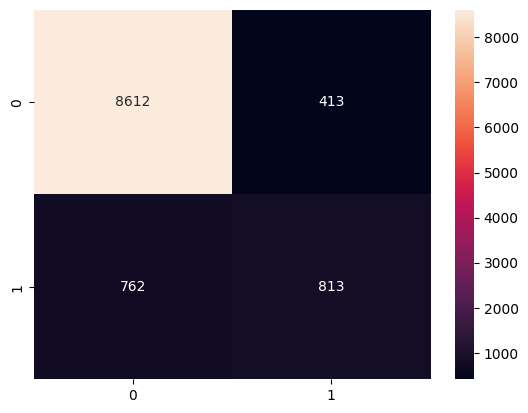

In [729]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

Accuracy Score: 0.8785221674876847
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      8613
           1       0.59      0.67      0.63      1537

    accuracy                           0.88     10150
   macro avg       0.76      0.79      0.78     10150
weighted avg       0.89      0.88      0.88     10150



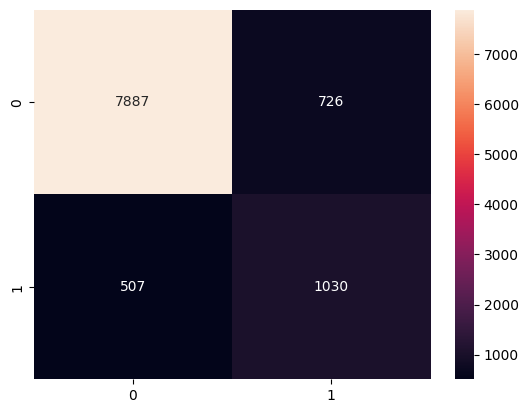

In [677]:
# Evaluate the tuned model
print("Accuracy Score:", accuracy_score(y_test, tuned_y_pred))
print("Classification Report:\n", classification_report(y_test, tuned_y_pred))
conf_matrix = confusion_matrix(y_test, tuned_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Player Over/Under Betting Predictors
### For loop to create dynamic models for each player's who has a betting line for points on the day and generate over/under predictions

In [735]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
warnings.filterwarnings('ignore')

data_for_2023 = pd.read_csv('2023/full_2023.csv')
data_for_2024 = pd.read_csv('2024/full_2024.csv')
frames = [data_for_2023, data_for_2024]
all_data = pd.concat(frames)
del all_data["Unnamed: 0"]
all_data = all_data.rename(columns={'Unnamed: 5': 'Away'})
all_data = all_data.rename(columns={'Unnamed: 7': '+/-'})
all_data['Away'] = all_data['Away'].replace('@', '1')
all_data['Away'] = all_data['Away'].fillna('0')
all_data = all_data[all_data['Player'] != 'Julian Champagnie']
all_data = all_data.fillna(0)
del all_data["+/-"]

# Numericize Minutes Played
all_data['MP'] = pd.to_numeric(all_data['MP'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])))
all_data = all_data.rename(columns={'Team_x': 'Team'})
all_data.to_csv('all_data.csv')



# Define the columns to include in the aggregation
metrics = ['MP', 'FG', 'FGA', 'FG%', 'PTS', 'AST', 'Season FG', 'FTA', 'FT', '3P', '3P%', 'Season FGA', 'Season TOV', 'Season 2PA', 'Team Rating', 'Team Offensive Rtg', 'Team Pace', 'Opp Team Defensive Rtg', 'Opp Team Pace', 'Opp Team TOV%', 'Opp Team DRB%']  # Add more columns as needed

# Define a window size for the rolling aggregation (adjust as needed)
window_size = 20

# Group by Player and Year, then apply the rolling mean with a window of 20 and min_periods to ensure we get averages even if < 20 games are available
rolling_avgs = all_data.groupby(['Player', 'Year'])[metrics].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Step 2: Shift the rolling averages so that each row reflects the average of the previous 20 games
rolling_avgs_shifted = rolling_avgs.shift(1)

# Give new column names to distinguish them
rolling_avgs_shifted.columns = [f'{col}_rolling_20' for col in rolling_avgs_shifted.columns]

# Step 3: Merge the rolling averages back into the original DataFrame
all_data_with_rolling_avgs = pd.concat([all_data, rolling_avgs_shifted], axis=1)

# Generate a list of rolling average column names
rolling_avg_columns = [f'{col}_rolling_20' for col in metrics]

# Drop rows where any of the rolling average columns contain NaN values
all_data_clean = all_data_with_rolling_avgs.dropna(subset=rolling_avg_columns)


# Initialize label encoders and encode categorical columns once, before the loop
le_dict = {}
columns_to_encode = ['Date', 'Age_game', 'Team', 'Opp', 'Player', 'Pos']
for column in columns_to_encode:
    le = LabelEncoder()
    all_data_with_rolling_avgs[column] = all_data_with_rolling_avgs[column].astype(str)
    # Fit and transform the data, then save the encoder for later use
    all_data[column] = le.fit_transform(all_data_with_rolling_avgs[column])
    le_dict[column] = le

# Define metrics and window size for rolling averages calculation
metrics = ['MP', 'FG', 'FGA', 'FG%', 'PTS', 'AST', 'Season FG', 'FTA', 'FT', '3P', '3P%', 'Season FGA', 'Season TOV', 'Season 2PA', 'Team Rating', 'Team Offensive Rtg', 'Team Pace', 'Opp Team Defensive Rtg', 'Opp Team Pace', 'Opp Team TOV%', 'Opp Team DRB%']  # Add more columns as needed
window_size = 40

# Calculate rolling averages
rolling_avgs = all_data.groupby(['Player', 'Year'])[metrics].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
rolling_avgs_shifted = rolling_avgs.shift(1)
rolling_avgs_shifted.columns = [f'{col}_rolling_20' for col in metrics]
all_data_with_rolling_avgs = pd.concat([all_data, rolling_avgs_shifted], axis=1).dropna()

# List of players, thresholds, and opponent teams (with corrections for opponent encoding)

# 2/5/2024 = {'Domantas Sabonis': (17.5, 'CLE'), 
#                    'Stephen Curry': (29.5, 'BRK'), 
#                    'Trae Young': (26.5, 'LAC'), 
#                    'Donovan Mitchell': (29.5, 'SAC'), 
#                    'Jonathan Kuminga': (18.5, 'BRK')}

# 2/6/2024 = {'Jimmy Butler': (18.5, 'ORL'), 
#                    'Bam Adebayo': (17.5, 'ORL'), 
#                    'Alperen Sengun': (23.5, 'IND'), 
#                    'Rudy Gobert': (14.5, 'CHI'), 
#                    'Tyrese Haliburton': (14.5, 'HOU'), 
#                    'Isaiah Hartenstein': (10.5, 'MEM'), 
#                    'Tyler Herro': (17.5, 'ORL'), 
#                    'Kevin Durant': (25.5, 'MIL'), 
#                    'Devin Booker': (28.5, 'MIL'),
#                    'Josh Hart': (12.5, 'MEM'),
#                    'Franz Wagner': (20.5, 'MIA'),
#                    'Giannis Antetokounmpo': (32.5, 'PHO')}

# 2/7/2024 = {'Trae Young': (24.5, 'ORL'), 
#                    'Jonathan Kuminga': (19.5, 'PHI'), 
#                    'Donovan Mitchell': (26.5, 'WAS'), 
#                    'Jayson Tatum': (27.5, 'ATL'), 
#                    'Brandon Miller': (22.5, 'TOR'), 
#                    'Draymond Green': (7.5, 'PHI'), 
#                    'RJ Barrett': (20.5, 'CHO'), 
#                    'Kristaps Porzingis': (19.5, 'ATL'),
#                    'Jaylen Brown': (21.5, 'ATL'),
#                    'Stephen Curry': (28.5, 'PHI'),
#                    'James Harden': (17.5, 'NOP'),
#                    'Evan Mobley': (13.5, 'WAS'),
#                    'Paul George': (20.5, 'NOP')}

# 2/8/2024 = {'John Collins': (14.5, 'UTA'), 
#                    'Luka Doncic': (33.5, 'NYK'), 
#                    'Nikola Jokic': (26.5, 'LAL'), 
#                    'Draymond Green': (6.5, 'IND'), 
#                    'Jonathan Kuminga': (20.5, 'IND'), 
#                    'Giannis Antetokounmpo': (34.5, 'MIN'), 
#                    'Josh Green': (10.5, 'NYK'), 
#                    'LeBron James': (25.5, 'DEN'),
#                    'Stephen Curry': (27.5, 'IND'),
#                    'Coby White': (24.5, 'MEM'),
#                    'Tyrese Haliburton': (19.5, 'GSW'),
#                    'Jalen Brunson': (32.5, 'DAL'),
#                    'Anthony Davis': (23.5, 'DEN')}

# 2/9/2024 = {'John Collins': (14.5, 'UTA'), 
#                    'Luka Doncic': (33.5, 'NYK'), 
#                    'Nikola Jokic': (26.5, 'LAL'), 
#                    'Draymond Green': (6.5, 'IND'), 
#                    'Jonathan Kuminga': (20.5, 'IND'), 
#                    'Giannis Antetokounmpo': (34.5, 'MIN'), 
#                    'Josh Green': (10.5, 'NYK'), 
#                    'LeBron James': (25.5, 'DEN'),
#                    'Stephen Curry': (27.5, 'IND'),
#                    'Coby White': (24.5, 'MEM'),
#                    'Tyrese Haliburton': (19.5, 'GSW'),
#                    'Jalen Brunson': (32.5, 'DAL'),
#                    'Anthony Davis': (23.5, 'DEN')}

# 2/10/2024 = {'Trae Young': (25.5, 'PHI'), 
#                    'Onyeka Okongwu': (12.5, 'PHI'), 
#                    'Jayson Tatum': (27.5, 'WAS'), 
#                    'Tyrese Maxey': (28.5, 'ATL'), 
#                    'RJ Barrett': (21.5, 'HOU'), 
#                    'Scottie Barnes': (20.5, 'HOU'), 
#                    'Alperen Sengun': (25.5, 'TOR'), 
#                    'Kyle Kuzma': (21.5, 'BOS'),
#                    'Giannis Antetokounmpo': (33.5, 'CHO'),
#                    'Domantas Sabonis': (19.5, 'DEN'),
#                    'Jamal Murray': (23.5, 'SAC')}

# 2/11/2024 = {'James Harden': (18.5, 'DET'), 
#                    'Evan Mobley': (13.5, 'TOR'), 
#                    'Cade Cunningham': (21.5, 'LAC'), 
#                    'Kawhi Leonard': (25.5, 'DET'), 
#                    'Pascal Siakam': (19.5, 'NYK'), 
#                    'Paul George': (21.5, 'DET'), 
#                    'Jalen Brunson': (30.5, 'IND'), 
#                    'Paolo Banchero': (23.5, 'CHI'),
#                    'Ben Simmons': (5.5, 'SAS'),
#                    'Cam Thomas': (23.5, 'SAS'),
#                    'Donovan Mitchell': (27.5, 'TOR')}

# 2/12/2024 = {'Jimmy Butler': (19.5, 'BOS'), 
#                    'Kristaps Porzingis': (18.5, 'MIA'), 
#                    'Shai Gilgeous-Alexander': (31.5, 'SAC'), 
#                    'Jaylen Brown': (18.5, 'MIA'), 
#                    'Domantas Sabonis': (19.5, 'OKC'), 
#                    'Jayson Tatum': (26.5, 'MIA'), 
#                    'Jalen Williams': (18.5, 'SAC'), 
#                    'Josh Giddey': (11.5, 'SAC'),
#                    'Luguentz Dort': (10.5, 'SAC'),
#                    'Keegan Murray': (13.5, 'OKC'),
#                    'Harrison Barnes': (13.5, 'OKC')}

list_of_players = {'Trae Young': (24.5, 'CHI'), 
                   'Luka Doncic': (32.5, 'WAS'), 
                   'Draymond Green': (8.5, 'UTA'), 
                   'Giannis Antetokounmpo': (30.5, 'DEN'), 
                   'Jakob Poeltl': (11.5, 'SAS'), 
                   'Stephen Curry': (20.5, 'UTA'), 
                   'Tyrese Haliburton': (19.5, 'CHO'), 
                   'Donovan Mitchell': (26.5, 'CLE'),
                   'Anthony Edwards': (25.5, 'LAC'),
                   'James Harden': (16.5, 'MIN'),
                   'DeMar DeRozan': (25.5, 'ATL')}

# For simplicity, let's assume all_data_with_rolling_avgs already includes the necessary features
# and target based on the rolling averages and player/opponent information

# Iterate over players to make predictions

for name, (betting_line, opp_team) in list_of_players.items():
    # Handle unseen labels for 'Opp' by using a try-except block
    try:
        encoded_opp = le_dict['Opp'].transform([opp_team])[0]
    except ValueError:
        print(f"Unseen opponent team: {opp_team}. Skipping prediction for {name}.")
        continue  # Skip this player if the opponent team is unseen

    # Filter data for the specific player
    encoded_player = le_dict['Player'].transform([name])[0]
    player_data = all_data_with_rolling_avgs[all_data_with_rolling_avgs['Player'] == encoded_player]

    # Dynamically create the "Target" column for the current player based on the betting line
    player_data['Target'] = (player_data['PTS'] > betting_line).astype(int)
    
    # Prepare features and target for model training
    predictors = [f'{col}_rolling_20' for col in metrics] + ['Player', 'Opp']
    X = player_data[predictors]
    y = player_data['Target']
    
    # Split the data into training and testing sets (consider using a more sophisticated method for time series data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train a new model for this player and betting line
    model = RandomForestClassifier(bootstrap = True, class_weight = 'balanced_subsample', max_depth = 30, min_samples_leaf = 4, min_samples_split = 10, n_estimators=300)
    model.fit(X_train, y_train)
    
    # Prepare the input DataFrame for prediction for the current player against the specific opponent
    X_game = player_data[predictors].iloc[-1:].copy()  # Use the most recent game data
    X_game['Opp'] = encoded_opp  # Set the opponent team for the prediction

    # Make the prediction
    probabilities = model.predict_proba(X_game)
    
    # Output the probabilities
    if probabilities.shape[1] == 2:
        print(f"Probability of {name} scoring under {betting_line} points: {probabilities[0][0] * 100:.2f}%")
        print(f"Probability of {name} scoring over {betting_line} points: {probabilities[0][1] * 100:.2f}%")
    else:
        print(probabilities)

Probability of Trae Young scoring under 24.5 points: 55.24%
Probability of Trae Young scoring over 24.5 points: 44.76%
Probability of Luka Doncic scoring under 32.5 points: 25.04%
Probability of Luka Doncic scoring over 32.5 points: 74.96%
Probability of Draymond Green scoring under 8.5 points: 68.34%
Probability of Draymond Green scoring over 8.5 points: 31.66%
Probability of Giannis Antetokounmpo scoring under 30.5 points: 72.60%
Probability of Giannis Antetokounmpo scoring over 30.5 points: 27.40%
Probability of Jakob Poeltl scoring under 11.5 points: 55.78%
Probability of Jakob Poeltl scoring over 11.5 points: 44.22%
Probability of Stephen Curry scoring under 20.5 points: 20.30%
Probability of Stephen Curry scoring over 20.5 points: 79.70%
Probability of Tyrese Haliburton scoring under 19.5 points: 82.75%
Probability of Tyrese Haliburton scoring over 19.5 points: 17.25%
Probability of Donovan Mitchell scoring under 26.5 points: 42.46%
Probability of Donovan Mitchell scoring over 26